Name: Barbra Lakot

Student No. 2300704677

Reg No. 2023/HD05/04677U

 **Title: Portuguese Bank Marketing (with social/economic context)**

The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).*italicized text*

**Dataset description**
Input variables:

  **bank client data:**

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")

   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")

   6 - balance: average yearly balance, in euros (numeric)

   7 - housing: has housing loan? (binary: "yes","no")

   8 - loan: has personal loan? (binary: "yes","no")

   **related with the last contact of the current campaign:**

   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

  10 - day: last contact day of the month (numeric)

  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12 - duration: last contact duration, in seconds (numeric)

   **other attributes:**

  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


  **Output variable (desired target):**

  17 - y - has the client subscribed a term deposit? (binary: "yes","no")



In [ ]:
#from google.colab import files

# Upload the file
#uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing important libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import VimeoVideo
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns

**Loading Dataset**

In [ ]:
#loading the training dataset
df = pd.read_csv ('/content/drive/MyDrive/bank-additional-full.csv', sep=';')

In [ ]:
#retrieving the dimensions of the dataframe
df.shape

(41188, 21)

The dataset has 41188 rows and 21 columns

In [ ]:
#displaying few rows of the dataset
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [ ]:
#getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Missing Attribute Values:** There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [ ]:
# calculating the number of categorical and numerical attributes
var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week",
                  "poutcome"]
var_numerical = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]
print(len(var_categorical), len(var_numerical))

10 10


The dataset 10 categorical variables and 10 numerical variables

**Handling Missing values**

In [ ]:
df.replace('unknown', np.NaN, inplace=True)

In [ ]:
df['job']=df['job'].fillna(df['job'].mode())

In [ ]:
df['education']=df['education'].fillna(df['education'].mode())

In [ ]:
df['contact']=df['contact'].fillna(df['contact'].mode())

In [ ]:
df['poutcome']=df['poutcome'].fillna(df['poutcome'].mode())

The dataset has several categorical missing values with "unknown" label. This label has been replaced with "NaN" label and then later imputated by using mode

In [ ]:
# Display the cleaned DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:

df.isnull().sum()/len(df)*100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

In [ ]:
# Number of distinct values in variables
for i, column in enumerate(df.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df[column].nunique()))

0. Age: 78
1. Job: 11
2. Marital: 3
3. Education: 7
4. Default: 2
5. Housing: 2
6. Loan: 2
7. Contact: 2
8. Month: 10
9. Day_Of_Week: 5
10. Duration: 1544
11. Campaign: 42
12. Pdays: 27
13. Previous: 8
14. Poutcome: 3
15. Emp.Var.Rate: 10
16. Cons.Price.Idx: 26
17. Cons.Conf.Idx: 26
18. Euribor3M: 316
19. Nr.Employed: 11
20. Y: 2


In [ ]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing

        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

# **Exploratory Data Analysis**

**i. Univariate Analysis and Segmented Univariate Analysis**

**a. Categorical Variables**

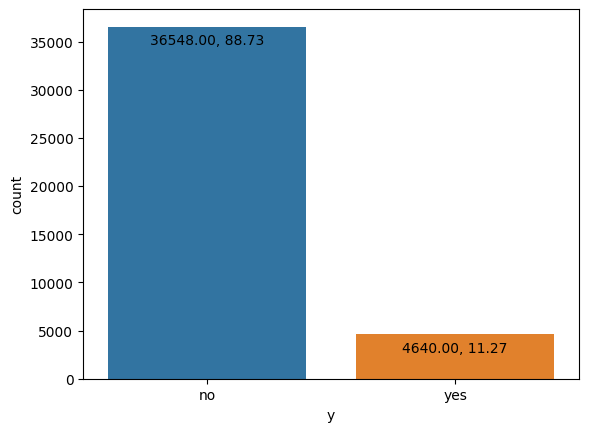

In [ ]:
ax = sns.countplot(x = df["y"])  #Imbalanced dataset
label_values(ax, spacing=-15)
plt.show()

Job


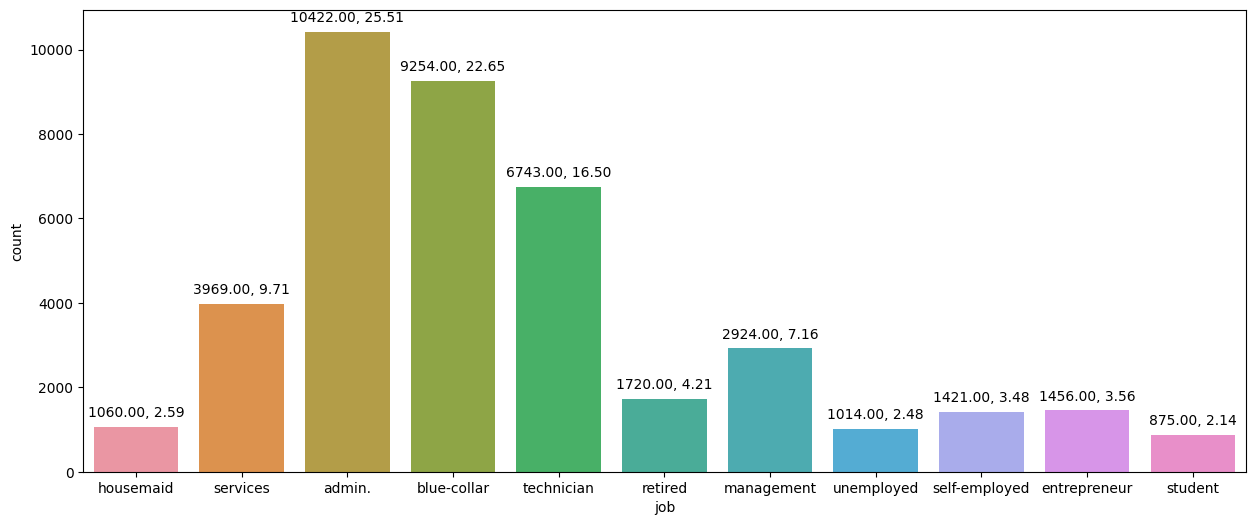

Marital


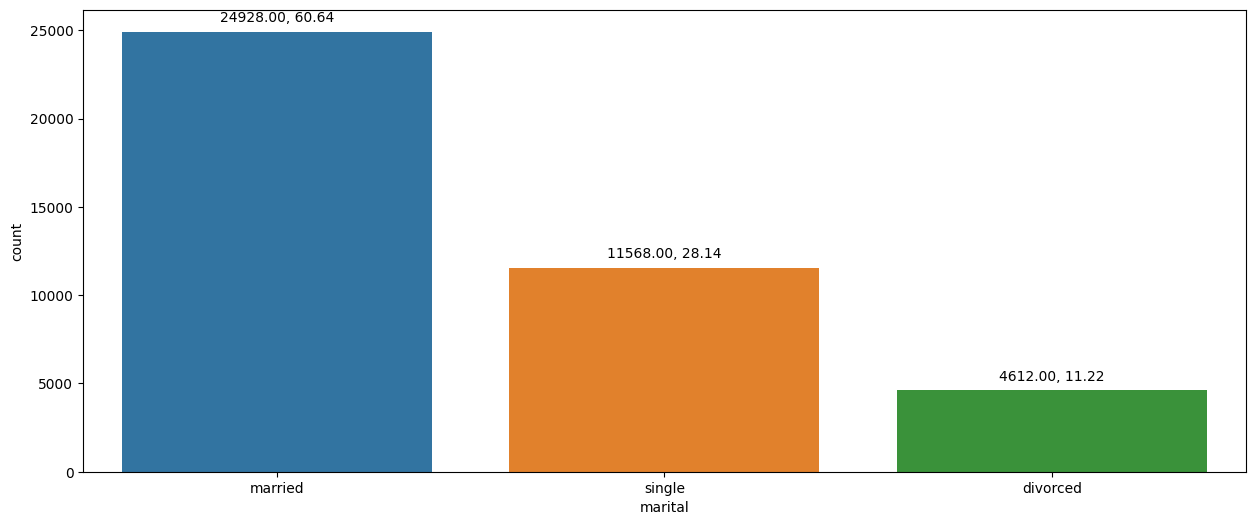

Education


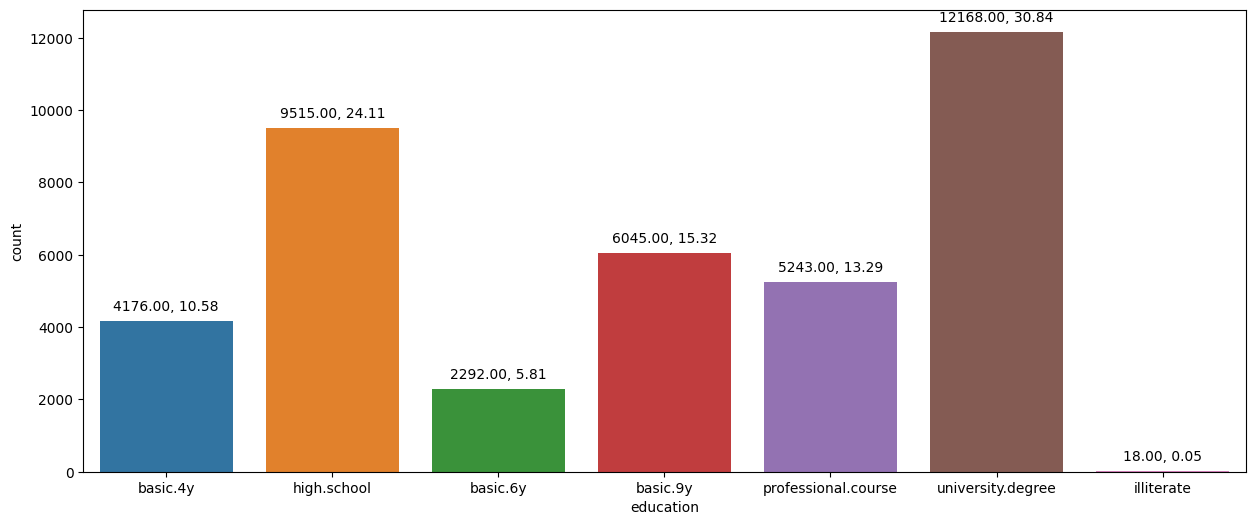

Default


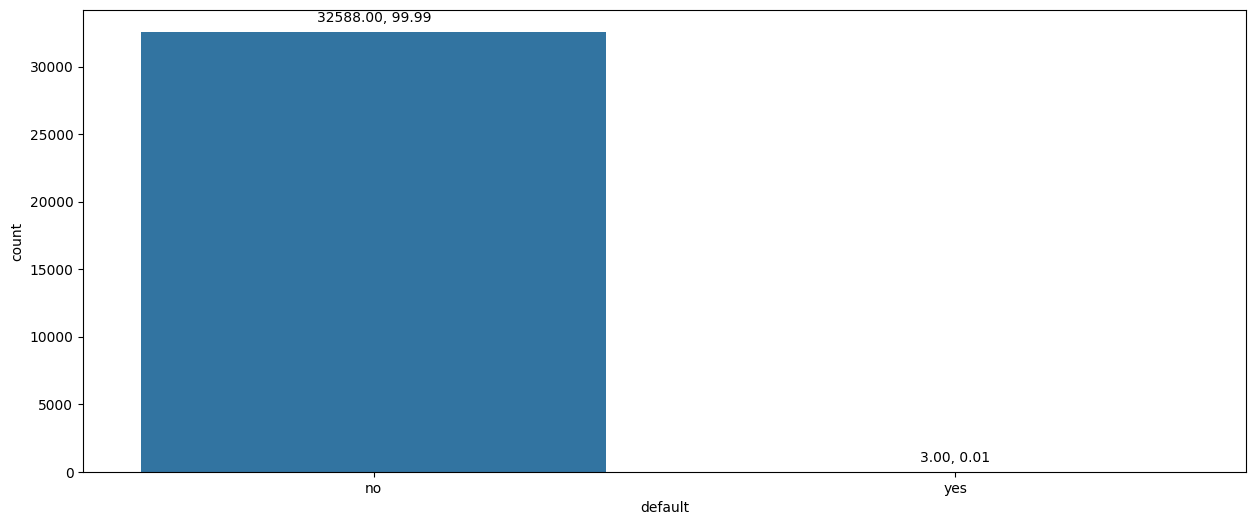

Housing


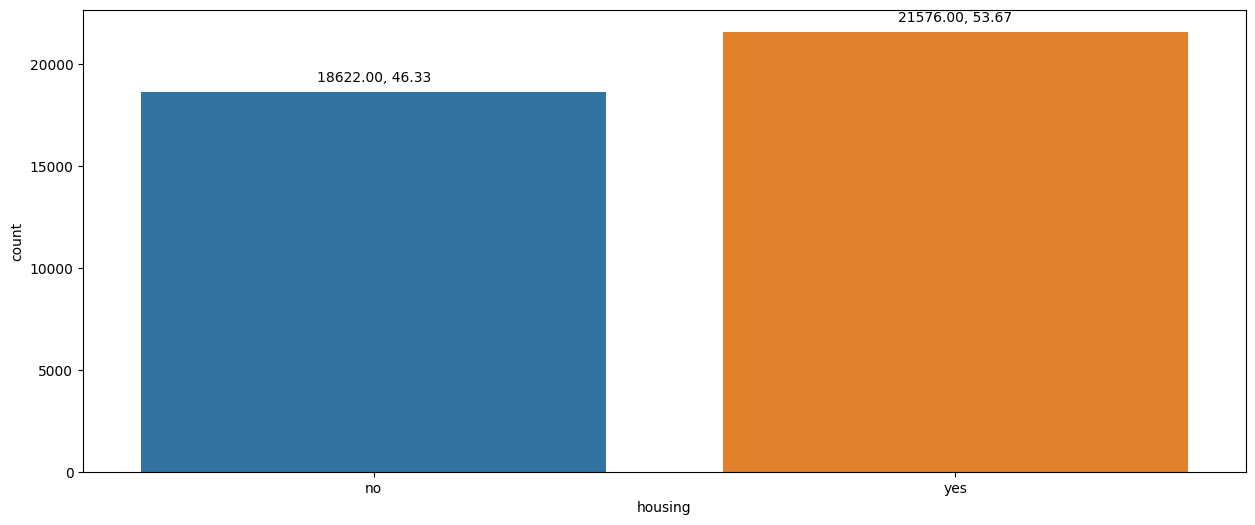

Loan


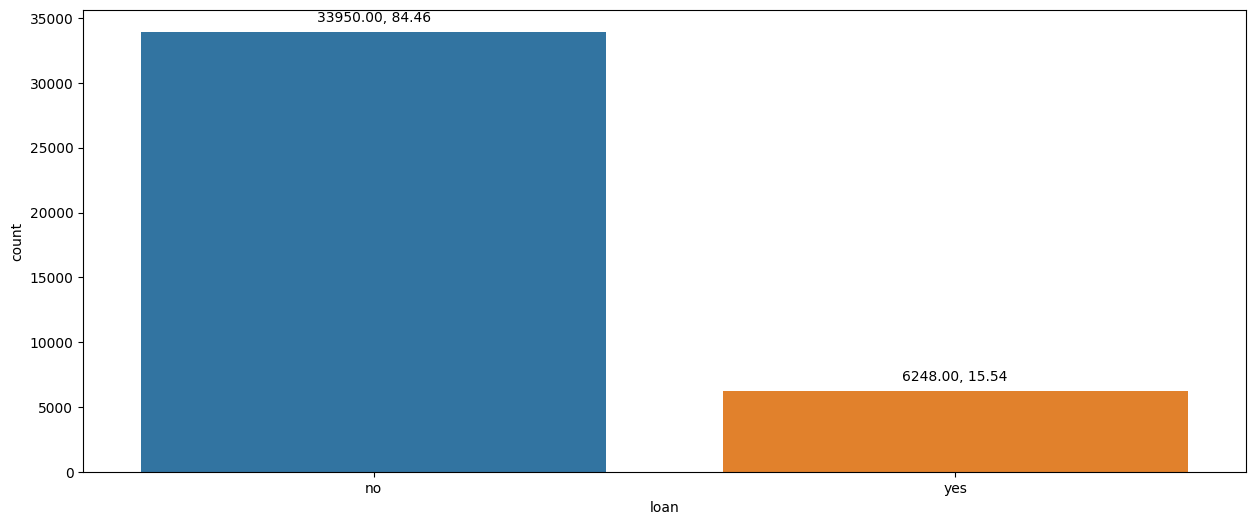

Contact


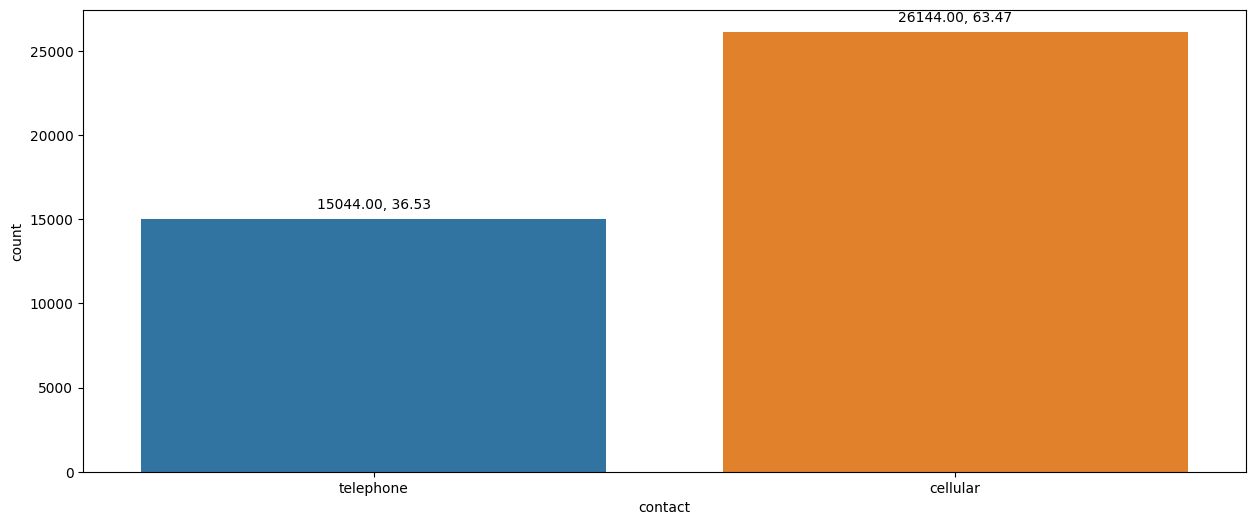

Month


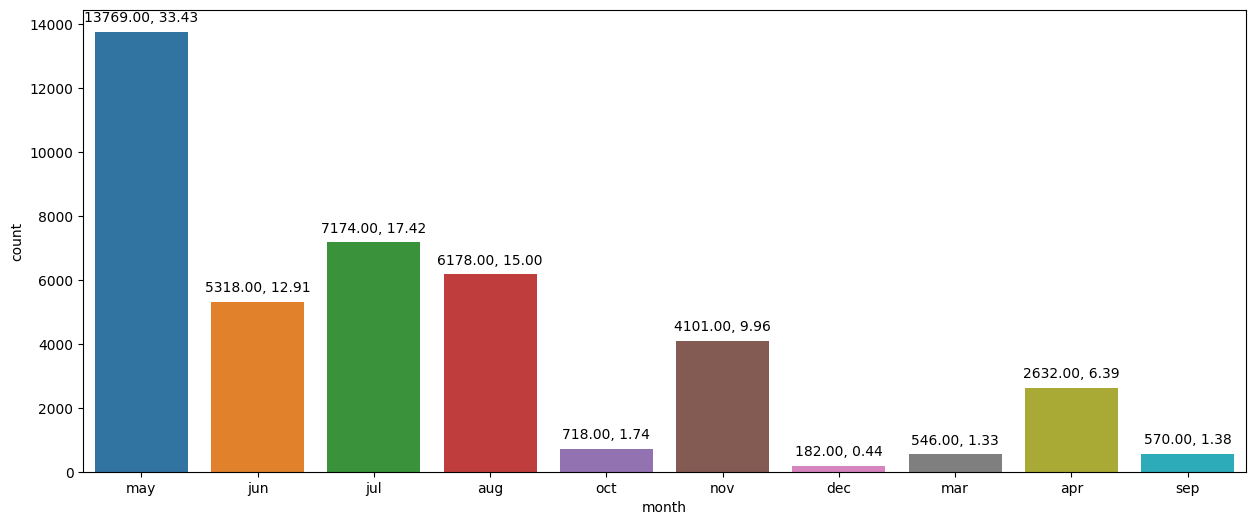

Day_Of_Week


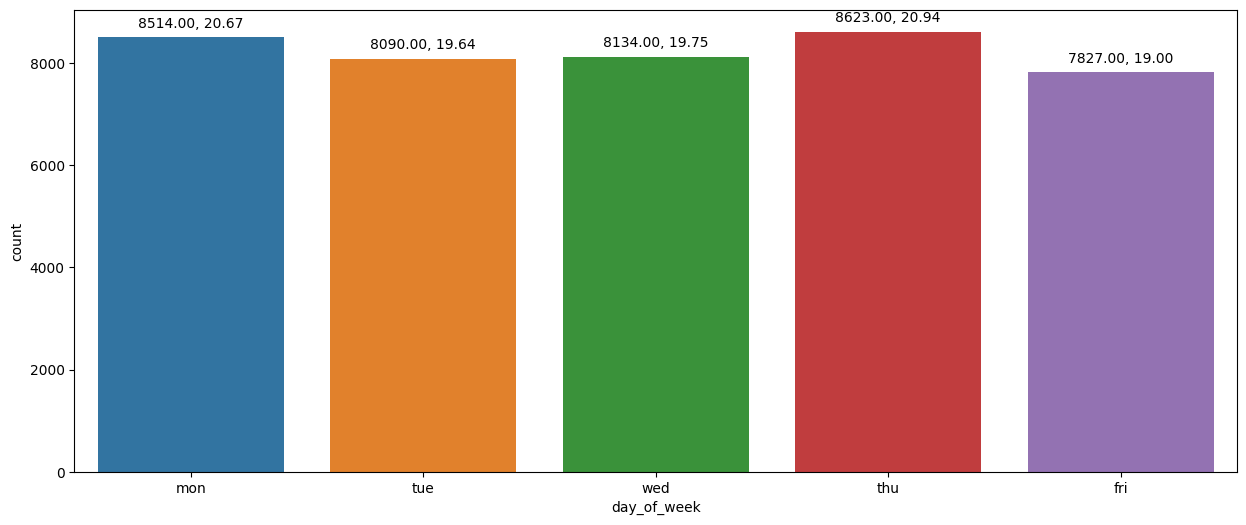

Poutcome


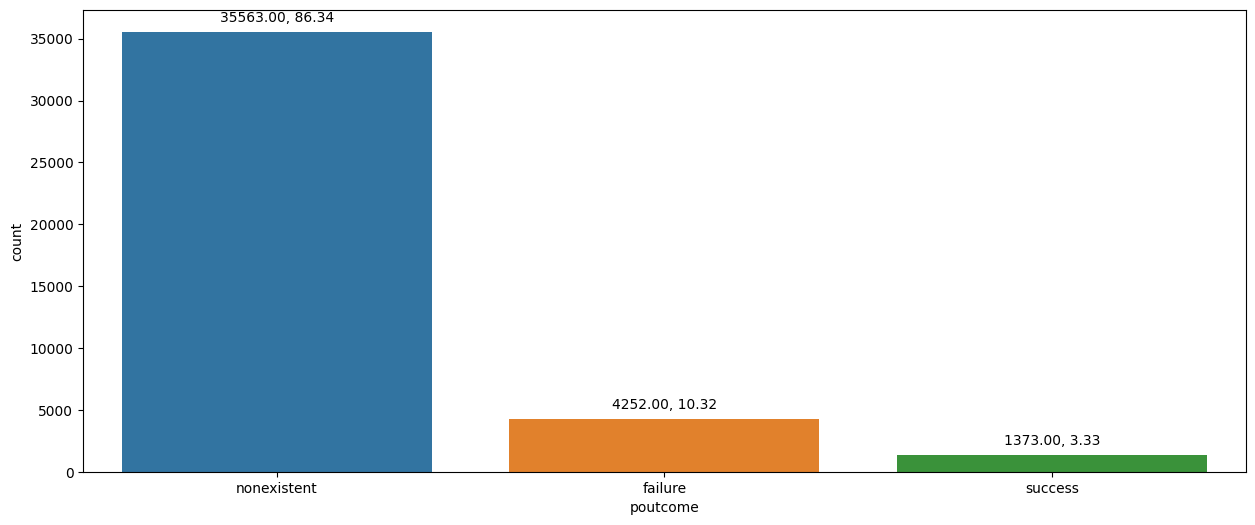

In [ ]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column])
    label_values(ax)
    plt.show()

Job


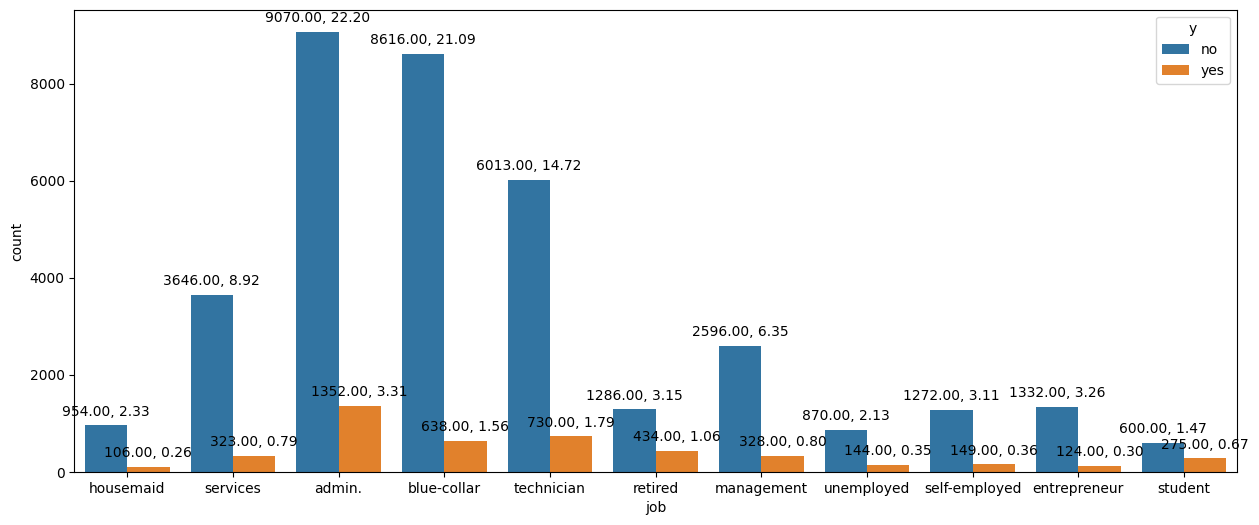

Marital


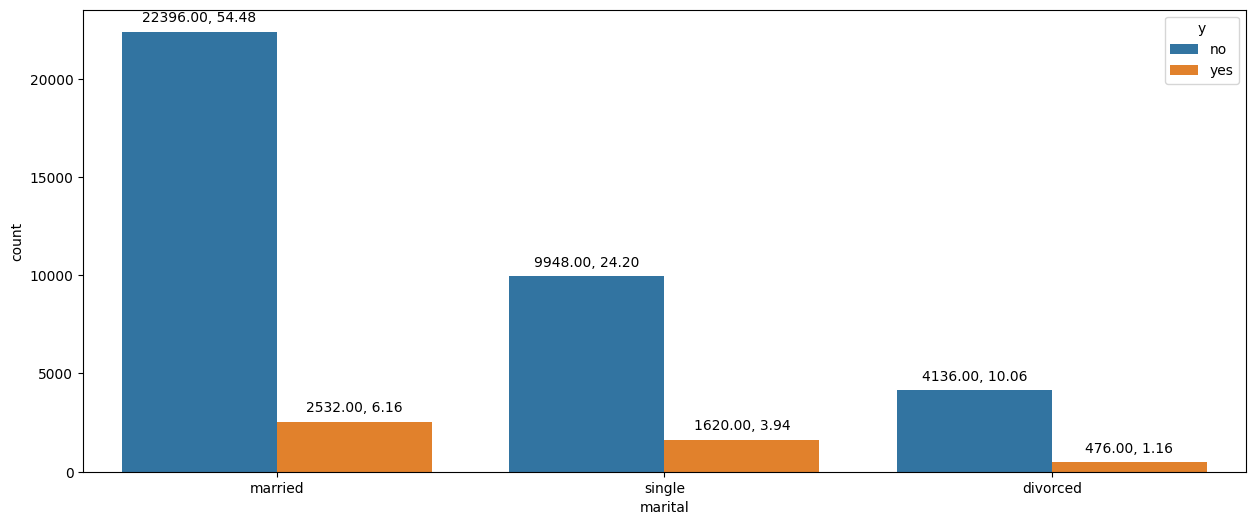

Education


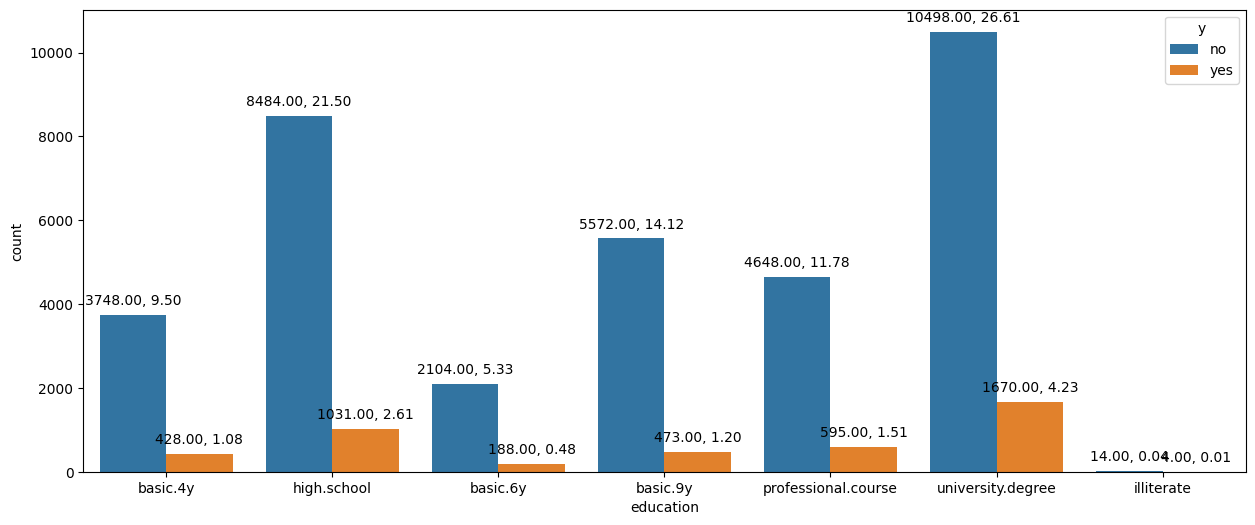

Default


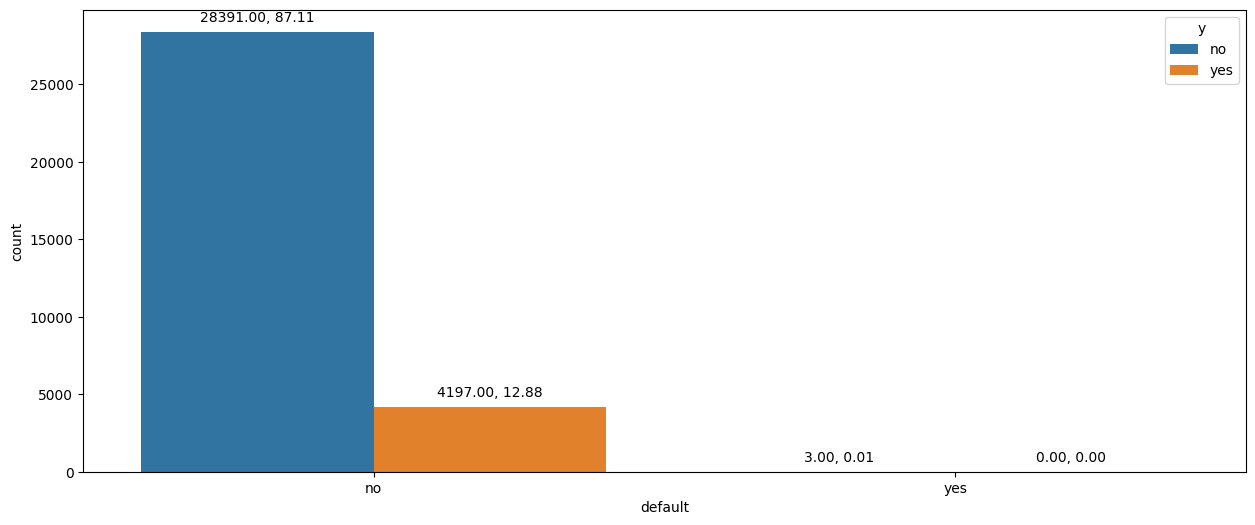

Housing


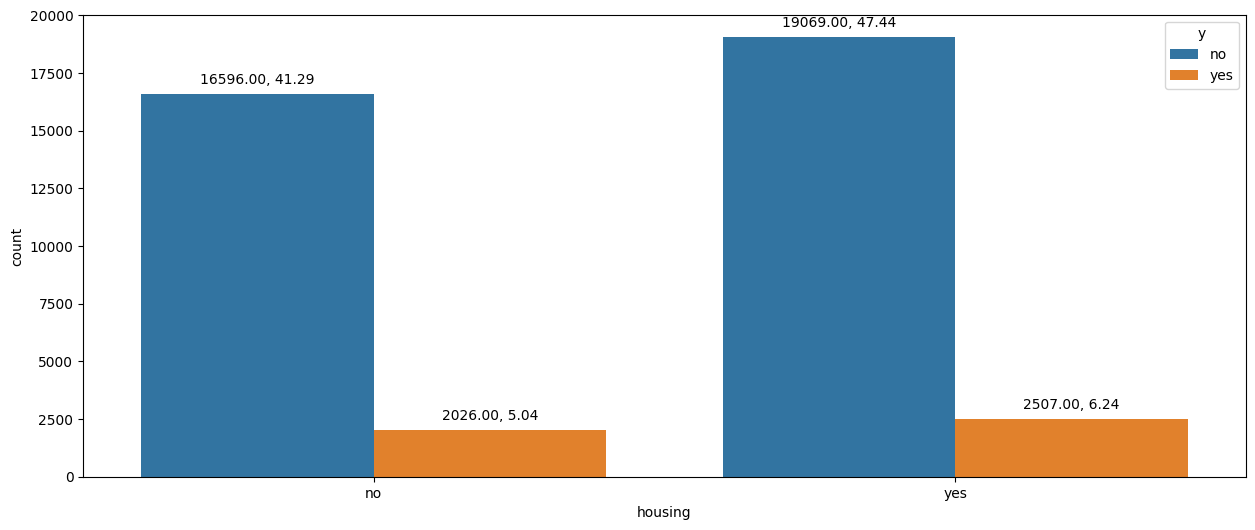

Loan


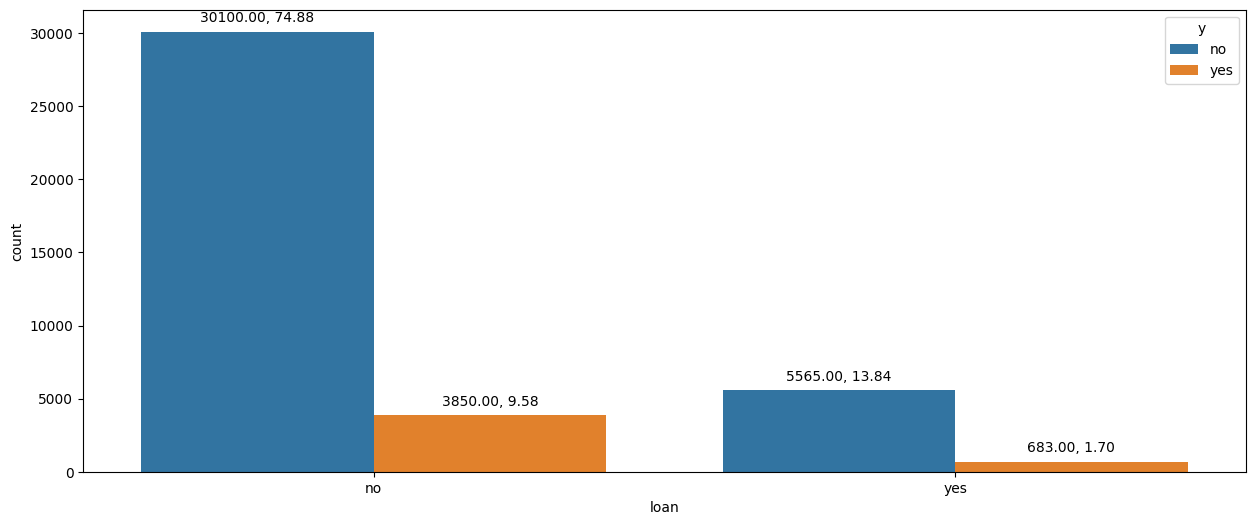

Contact


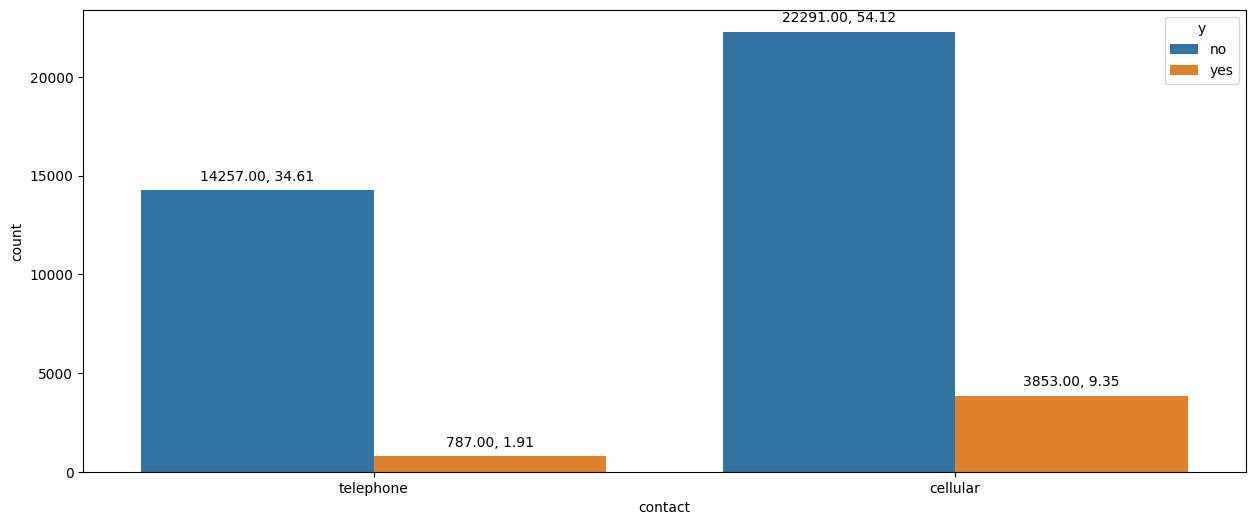

Month


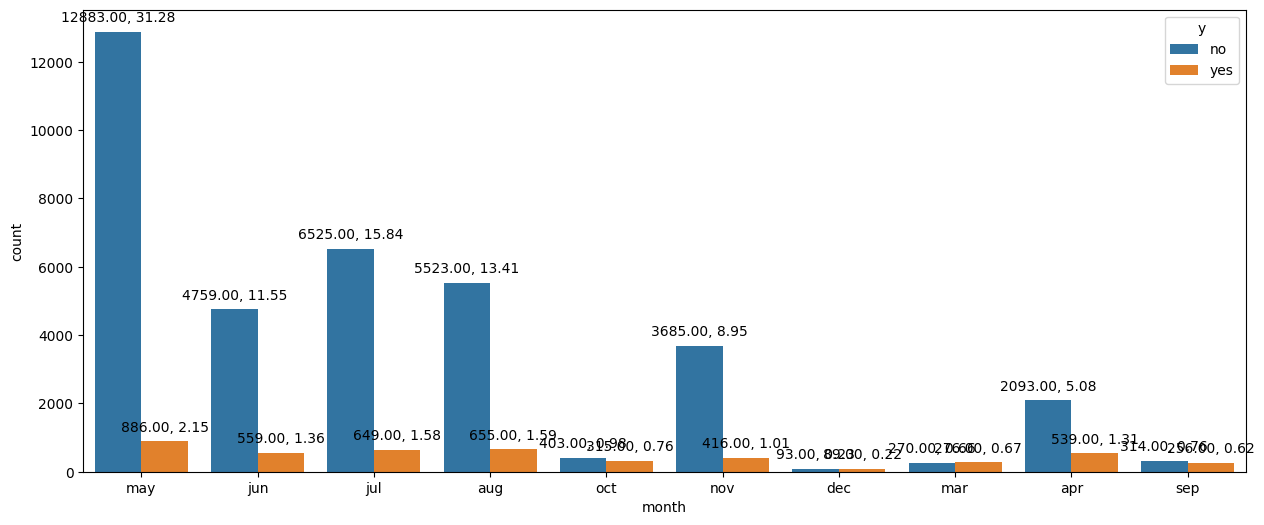

Day_Of_Week


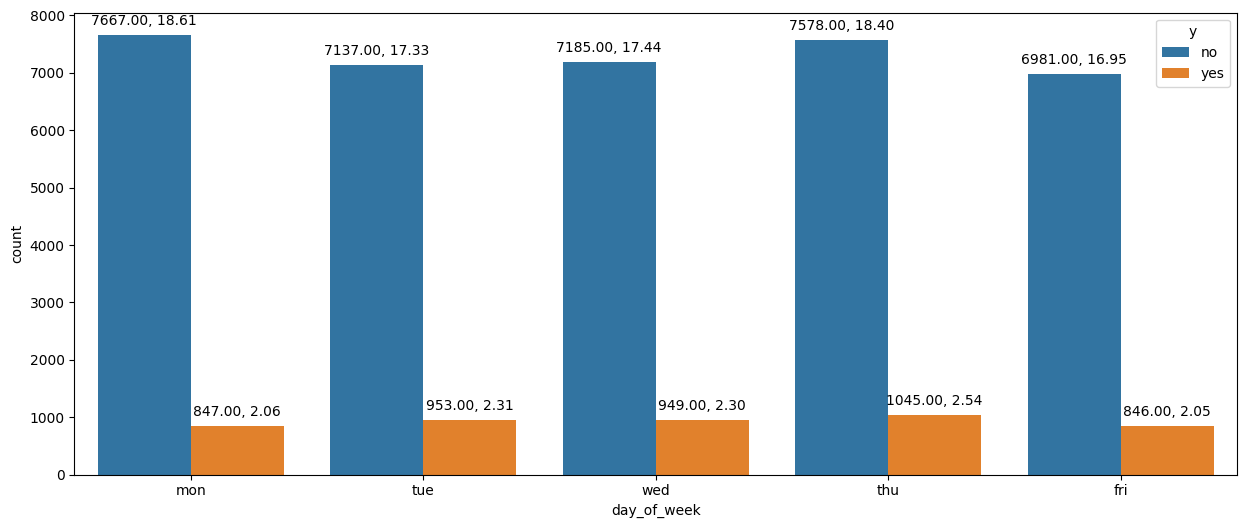

Poutcome


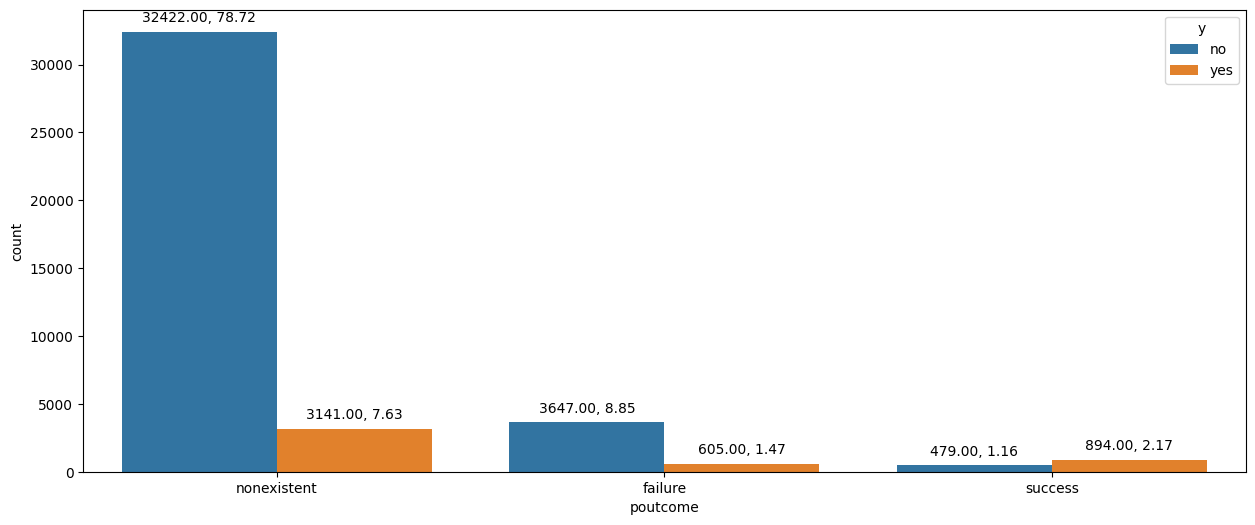

In [ ]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column], hue=df["y"])
    label_values(ax)
    plt.show()

**Insights from categorical variables (based on univariate analysis)**

1. Job: Highest Number (around 25%) of application are from admin type of job.
2. Default: Default variable has no impact on the client subscribing for term deposit. As we can see with no as input client took the term deposit and client having credit are not taking term deposit. So we will drop this feature.
3. Marital: Around 60% of client were approached were married.
4. Education: Client with university degree and high school were approached more as compare to other and they have higher success rate as well. (in terms of term deposit number)
5. Housing: Housing loan does not have much effect on the number of term deposit purchased.
6. Loan: We approach around 84% of client with not having personal loan.
7. Contact: Around 64% calls are from cellular.
8. Month: Around 33% were approached in may and in January, Febuary we don't have data or no one was approached. Success rate was almost same in june, july and August.
9. day_of_week: We have 5 days collected values. There is no significant different in the number of client approached and number of people subscribed.
10. poutcome: If a client took the term deposit last time than there is higher chances of that client subscribing to it again.

In [ ]:
# Default variable has no impact on the client subscribing for term deposit.
df.drop(["default"], axis = 1, inplace=True)

In [ ]:
var_categorical = list(set(var_categorical) - set(['default']))

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   duration        38245 non-null  int64  
 10  campaign        38245 non-null  int64  
 11  pdays           38245 non-null  int64  
 12  previous        38245 non-null  int64  
 13  poutcome        38245 non-null  object 
 14  emp.var.rate    38245 non-null  float64
 15  cons.price.idx  38245 non-null  float64
 16  cons.conf.idx   38245 non-null  float64
 17  euribor3m       38245 non-null 

**b. Numerical Variables**

In [ ]:
#### Drop the duration (as Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.)
duration = df["duration"]
df.drop(["duration"], axis = 1, inplace=True)

In [ ]:
var_numerical = list(set(var_numerical) - set(['duration']))

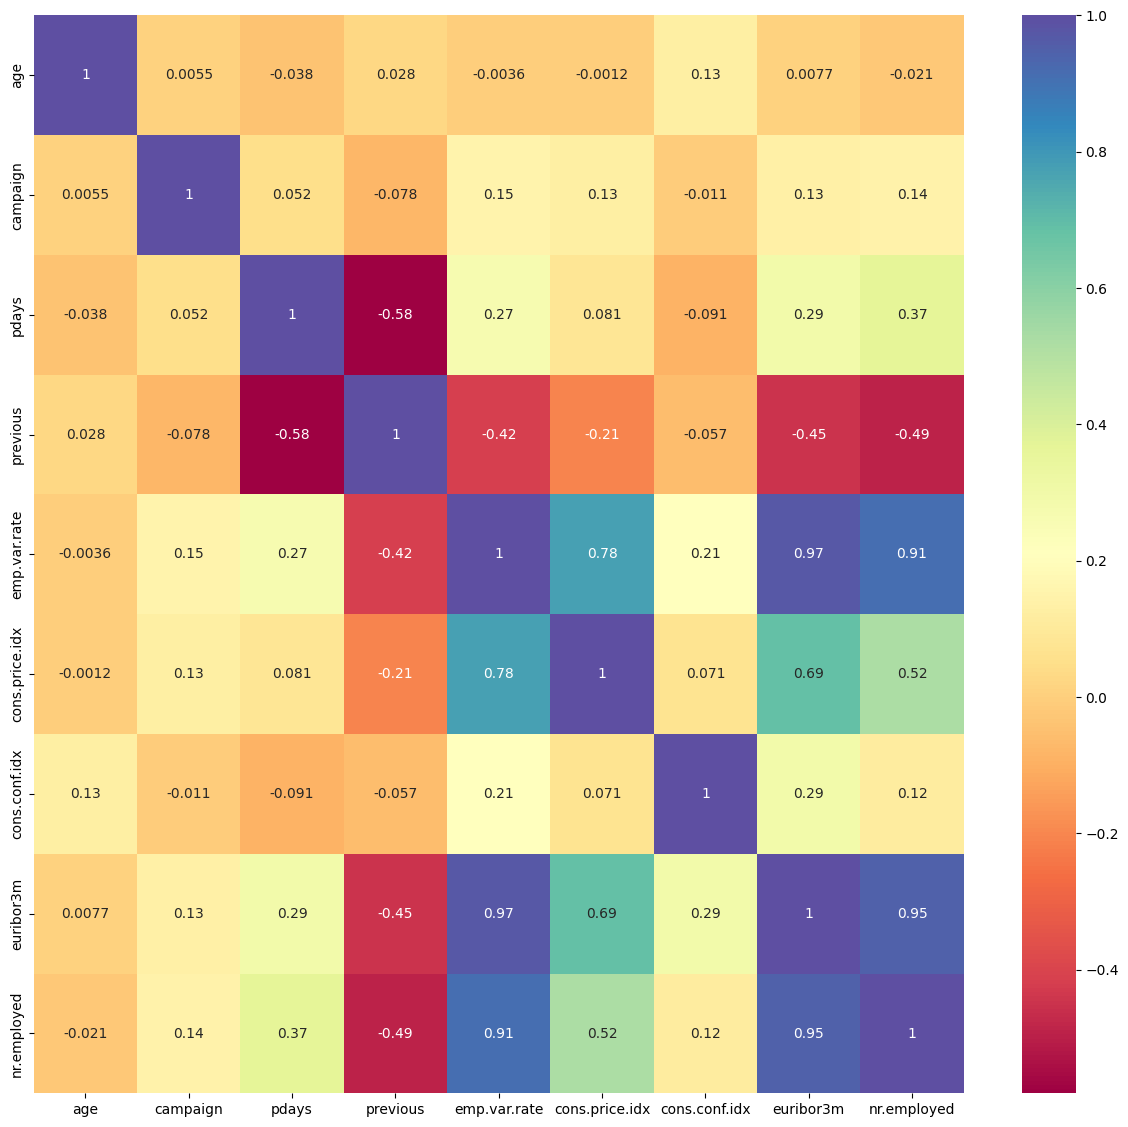

In [ ]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

**Handle highly correlated variables**

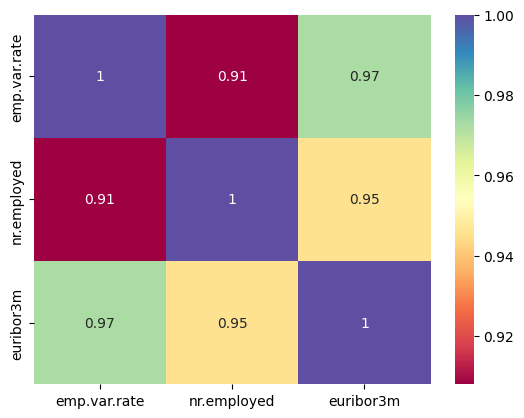

In [ ]:
sns.heatmap(df[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap='Spectral')
plt.show()

**Positive high correlation between:**
1. 'emp.var.rate' and 'nr.employed'
2. 'emp.var.rate' and 'euribor3m'
3. 'euribor3m' and 'nr.employed'

**Euribor** is the acronym for the Euro Interbank Offered Rate. This is the interest rate at which credit institutions lend money to each other, which is often referred to as **“the price of money”**.

With this we can say that 'emp.var.rate' (employment variation rate ) and 'nr.employed' (number of employees) are positively correlated with euribor. So we will drop **'emp.var.rate' and 'nr.employed'** as **'euribor'** also give us the price of money in current market.

In [ ]:
df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)

In [ ]:
var_numerical = list(set(var_numerical) - set(['emp.var.rate', 'nr.employed']))

Previous


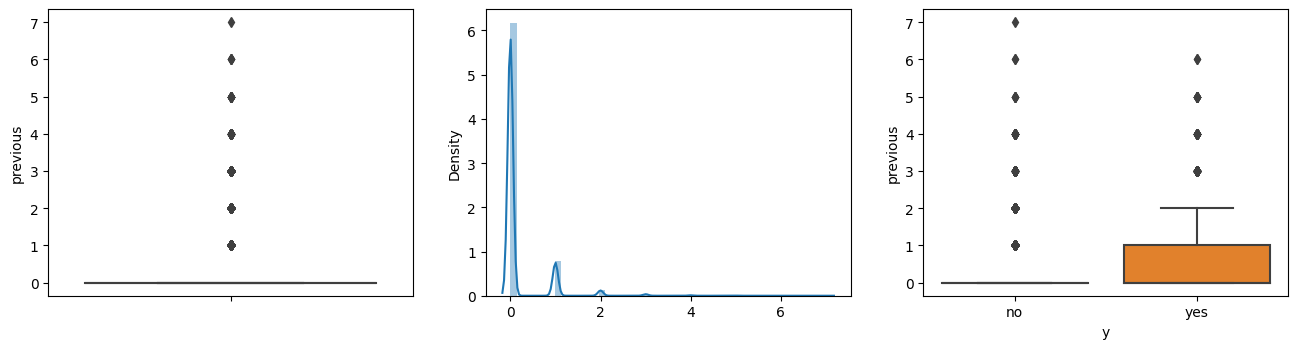

Pdays


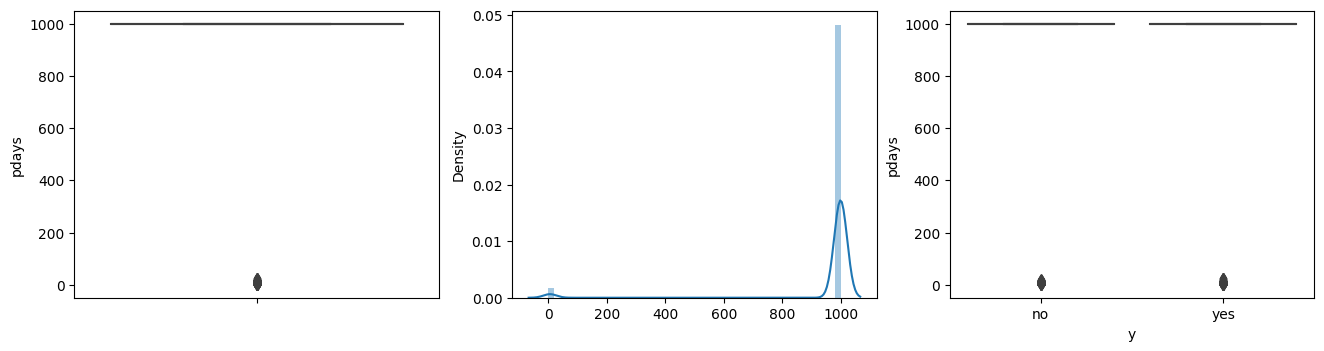

Cons.Price.Idx


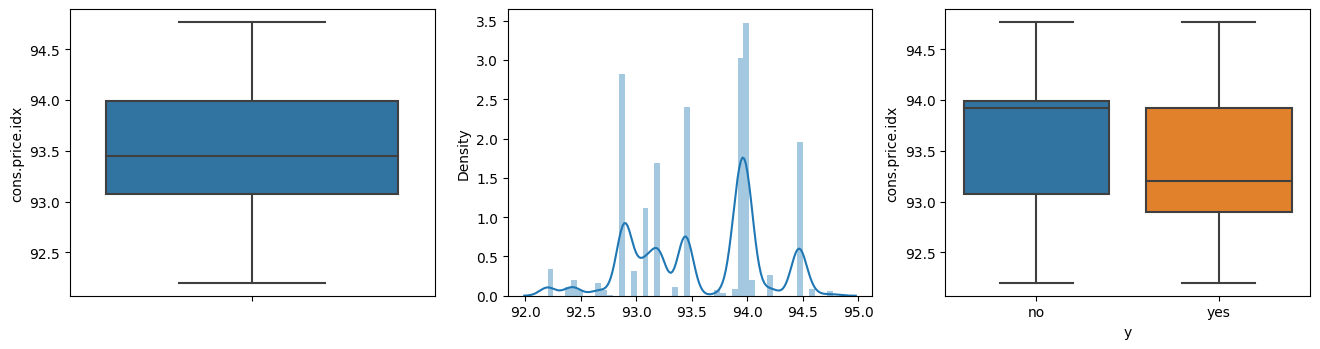

Cons.Conf.Idx


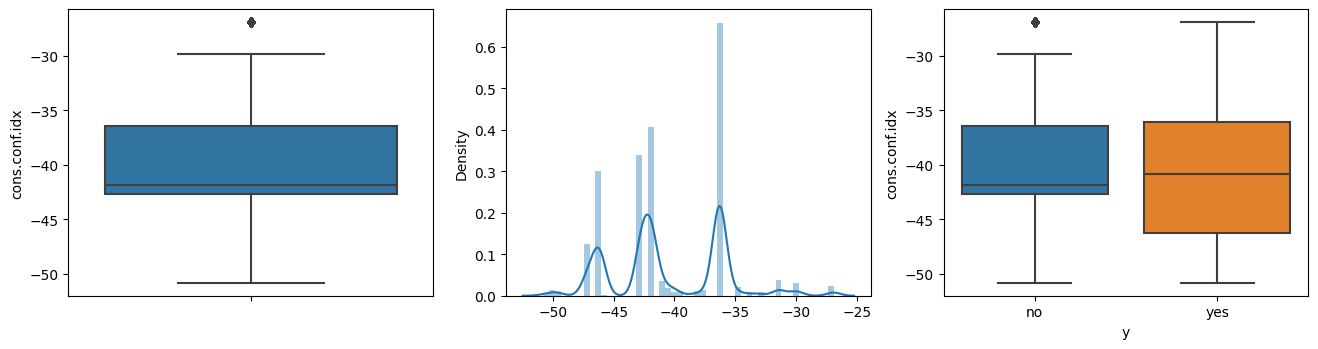

Campaign


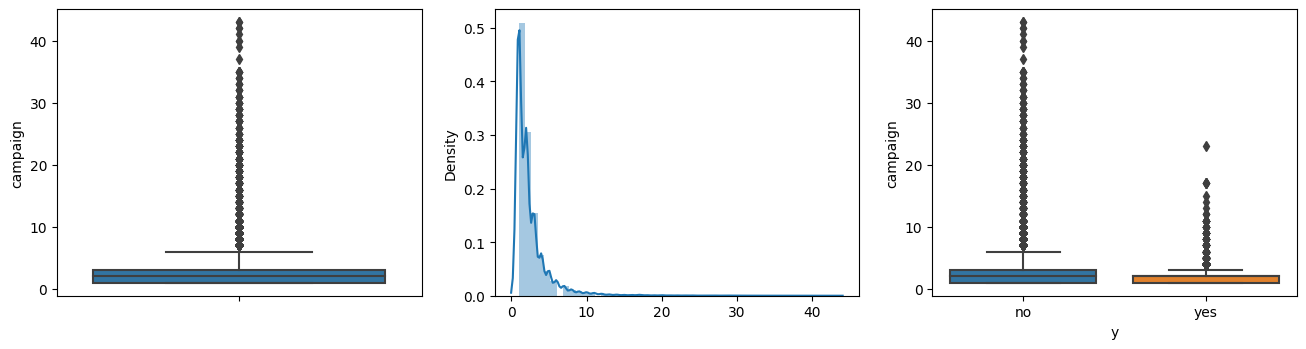

Age


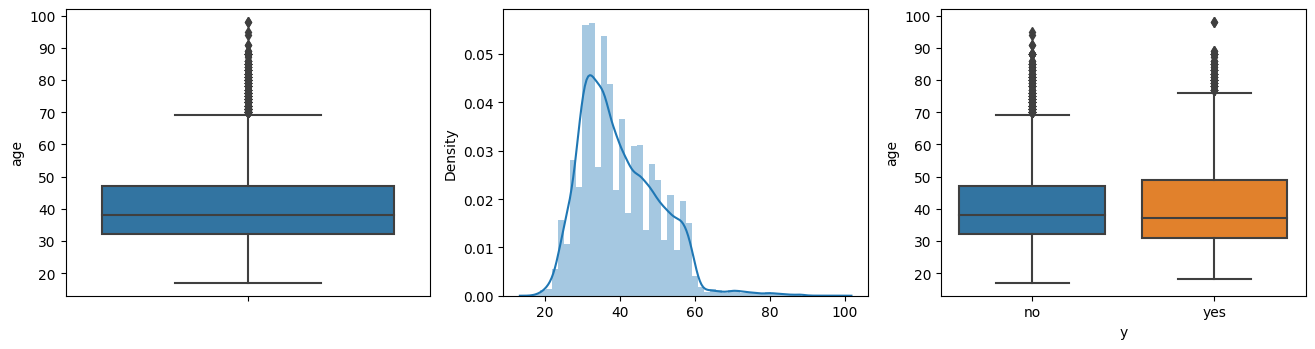

Euribor3M


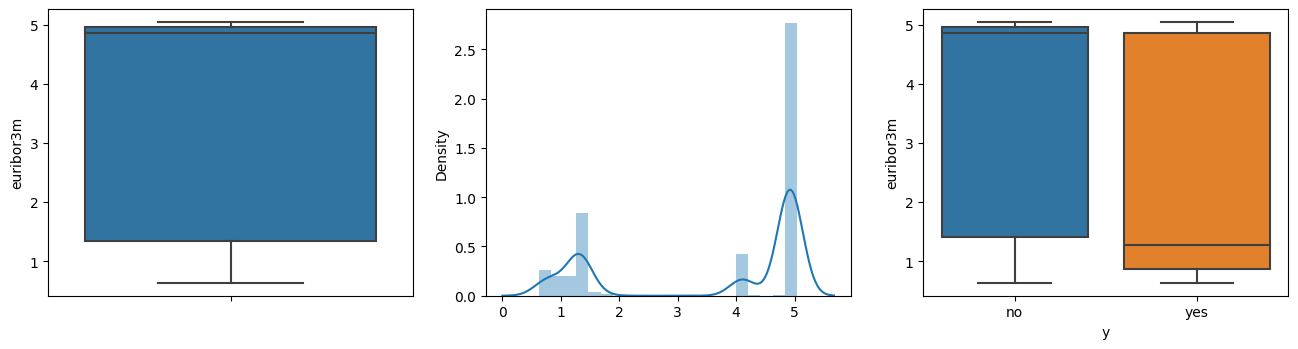

In [ ]:
i = 1
for column in var_numerical:
    print(column.title())
    plt.subplots(figsize=(16, 35))
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(y = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.distplot(x = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(x = df["y"], y = df[column])
    i += 1
    plt.show()

In [ ]:
#key statistics of numerical variables
df[var_numerical].describe()

campaign  cons.price.idx           age     euribor3m         pdays  \
count  38245.000000    38245.000000  38245.000000  38245.000000  38245.000000   
mean       2.566662       93.570313     39.860871      3.623298    963.531651   
std        2.767473        0.576367     10.289488      1.730226    184.295254   
min        1.000000       92.201000     17.000000      0.634000      0.000000   
25%        1.000000       93.075000     32.000000      1.344000    999.000000   
50%        2.000000       93.444000     38.000000      4.857000    999.000000   
75%        3.000000       93.994000     47.000000      4.961000    999.000000   
max       43.000000       94.767000     98.000000      5.045000    999.000000   

           previous  cons.conf.idx  
count  38245.000000   38245.000000  
mean       0.170009     -40.541164  
std        0.487169       4.623200  
min        0.000000     -50.800000  
25%        0.000000     -42.700000  
50%        0.000000     -41.800000  
75%        0.000000     -36.400000  
max        7.000000     -26.900000

**Handling Outliers in 'campaign', 'age', 'previous', 'cons.conf.idx', 'pdays'**

In [ ]:
print(df["campaign"].quantile(0.05), len(df[df["campaign"]<df["campaign"].quantile(0.05)] ))
print(df["campaign"].quantile(0.95), len(df[df["campaign"]>df["campaign"].quantile(0.95)] ))

1.0 0
7.0 1636


In [ ]:
df1 = df[(df["campaign"] > 23) & (df["y"] == 'yes')]
len(df1[['campaign', 'y']])

0

In [ ]:
df1 = df[(df["campaign"] > 8) & (df["y"] == 'yes')]
print(len(df1[['campaign', 'y']]), len(df[df["campaign"]>8]))

49 1264


In [ ]:
# We will convert all the values above 10 in campaign to 10
df["campaign"] = df["campaign"].apply(lambda x: 8 if x > 8 else x)

In [ ]:
print(df["age"].quantile(0.05), len(df[df["age"]<df["age"].quantile(0.05)] ))
print(df["age"].quantile(0.95), len(df[df["age"]>df["age"].quantile(0.95)] ))

26.0 1484
58.0 1435


In [ ]:
print(df["previous"].quantile(0.05), len(df[df["previous"]<df["previous"].quantile(0.05)] ))
print(df["previous"].quantile(0.95), len(df[df["previous"]>2] ))

0.0 0
1.0 273


In [ ]:
for i in range(1, max(df["previous"])+1):
    print(i, end = " ")
    df1 = df[(df["previous"] >= i) & (df["y"] == 'yes')]
    print(len(df1[['previous', 'y']]), len(df[df["previous"]>= i]))

1 1336 5179
2 466 945
3 160 273
4 43 78
5 13 21
6 2 5
7 0 1


In [ ]:
# We will convert all the values above 2 in previous to 2
df["previous"] = df["previous"].apply(lambda x: 2 if x >= 2 else x)

In [ ]:
print(df["pdays"].quantile(0.05), len(df[df["pdays"]<df["pdays"].quantile(0.05)] ))
print(df["pdays"].quantile(0.95), len(df[df["pdays"]>df["pdays"].quantile(0.95)] ))

999.0 1366
999.0 0


In [ ]:
df1 = df[(df["pdays"] >= 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]>=999]))
df1 = df[(df["pdays"] < 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<999]))
df1 = df[(df["pdays"] < 28) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<28]))
df1 = df[(df["pdays"] < 20) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<20]))
df1 = df[(df["pdays"] < 10) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<10]))

3393 36879
865 1366
865 1366
858 1358
734 1140


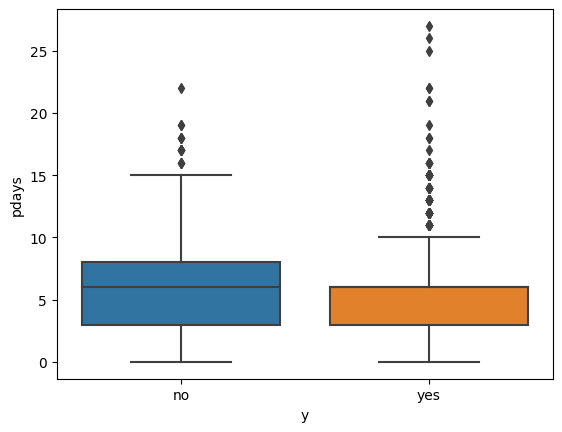

In [ ]:
# Look into the pdays values which are less than 999
df1 = df[~(df["pdays"] >= 999)]
sns.boxplot(x = df1["y"], y = df1['pdays'])
plt.show()

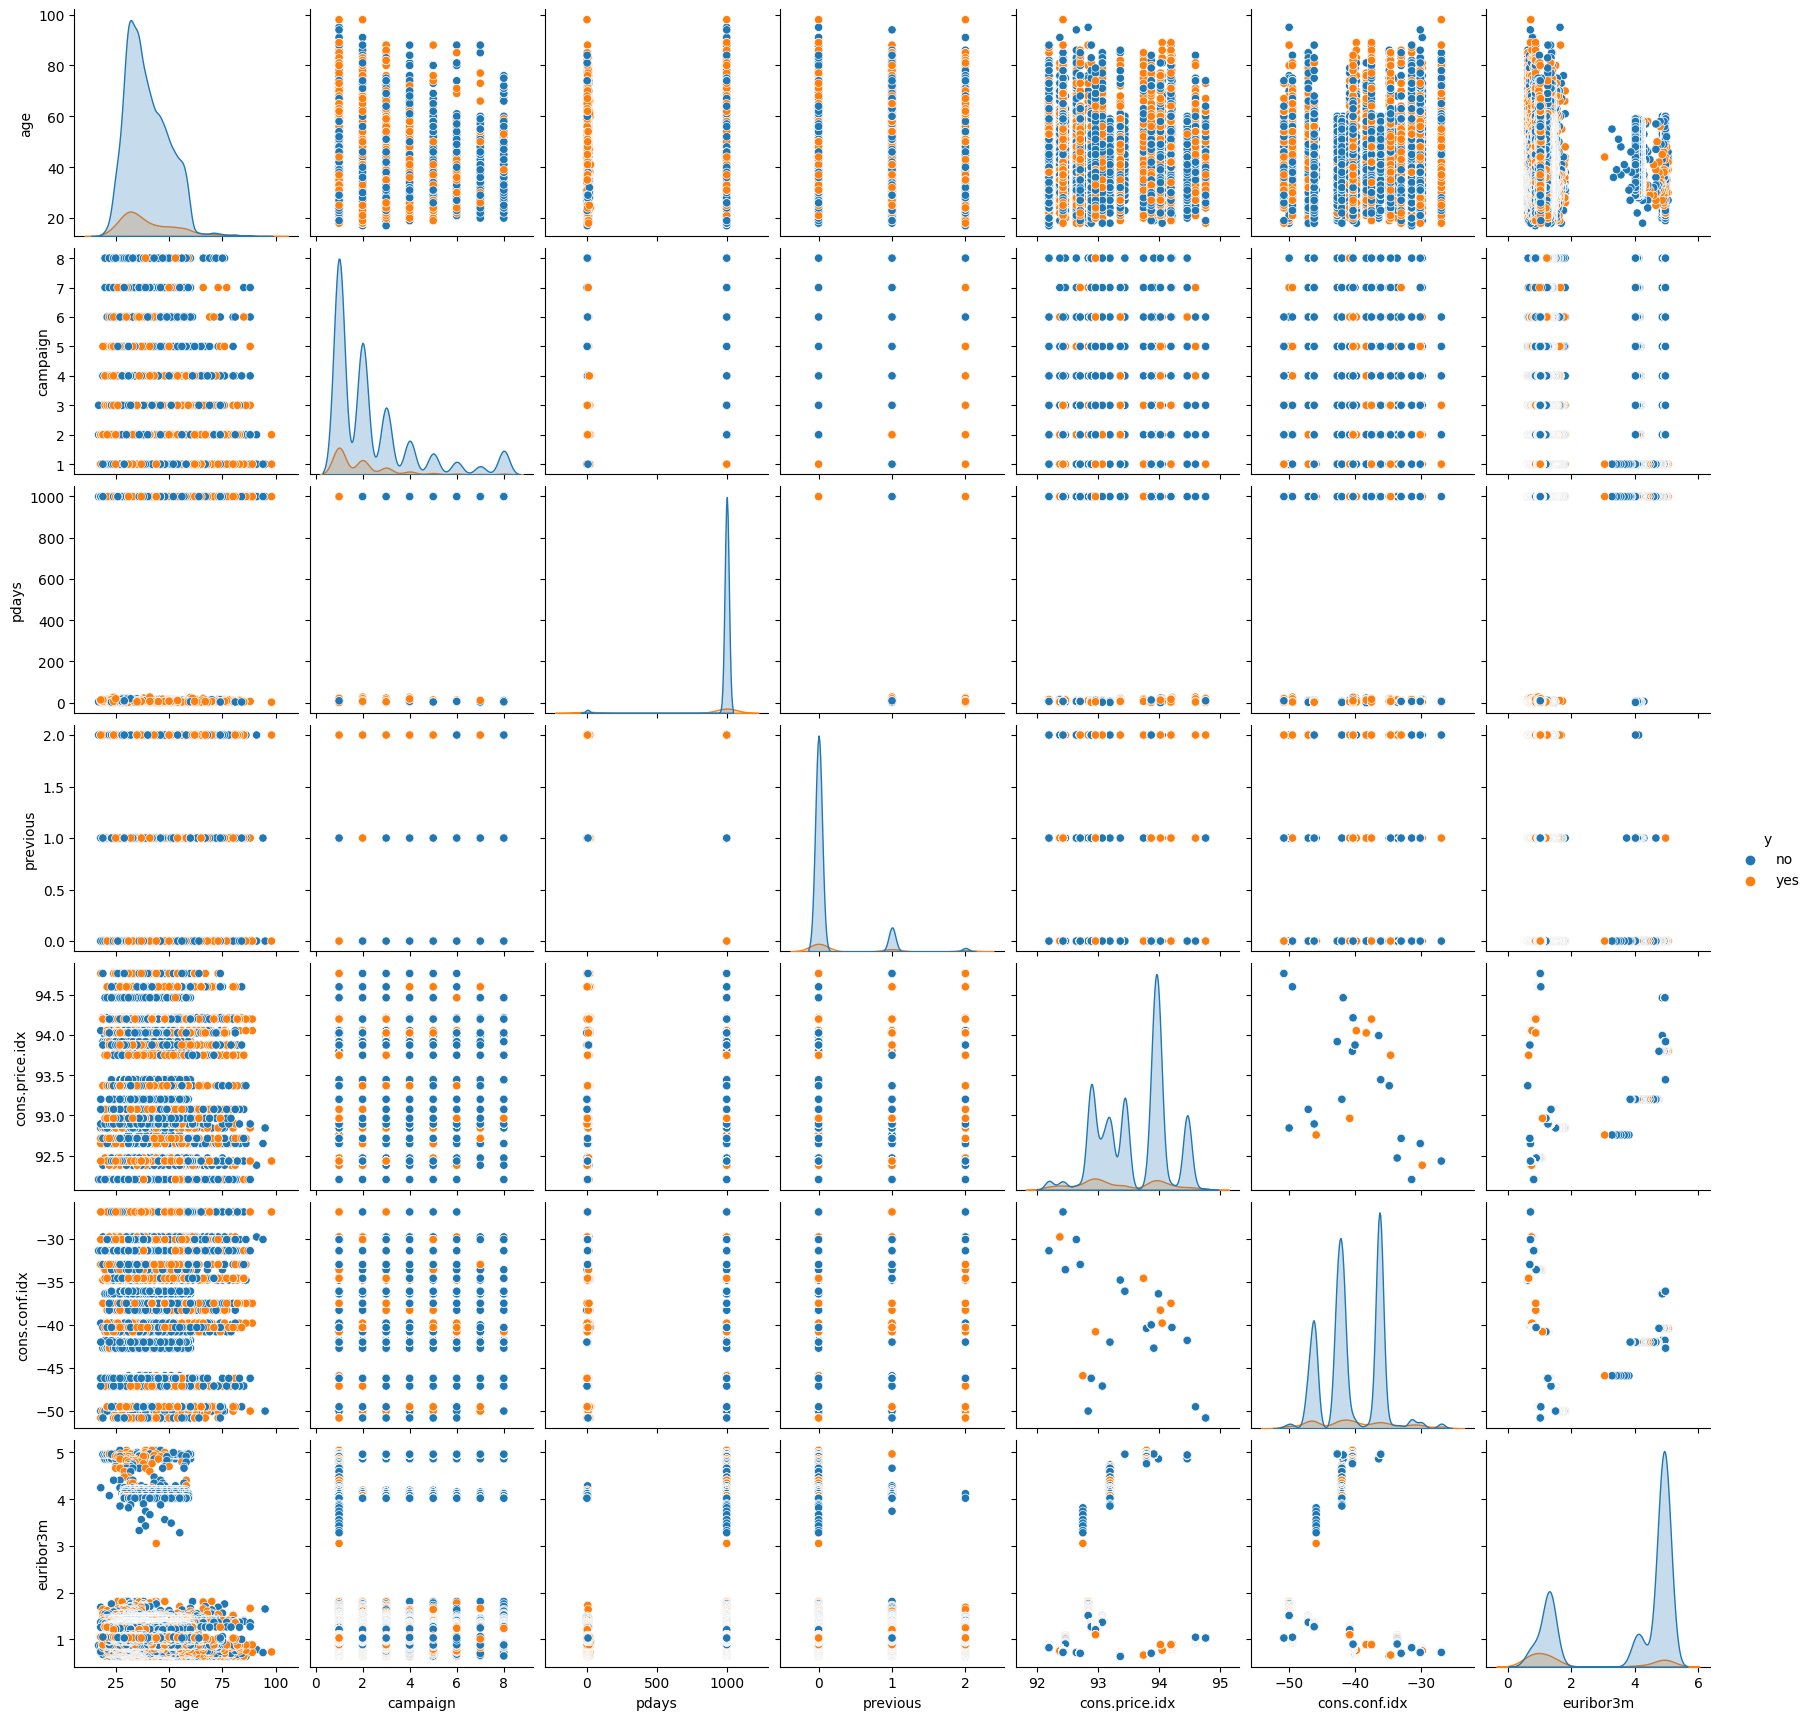

In [ ]:
# visualizing numerical columns
sns.pairplot(hue='y', data = df)
plt.show()

**Insights from continuous variables**


1. Campaign: If the number of contacts performed during this campaign and for this client become more than 23 then there is very high possibility that client will not subscribe for term deposit. Even if we contact a person more than 8 times probability is still low.
**We will drop this column as it will not be known before hand. But it is important to see that we should not contact any client more than 8 times during any campaign.**<br>
2. Consumer price index: If this value is high then probability of client not subscribing is slightly higher. <br>
3. Previous: If we contact client before a campaign then there is high chances that client will subscribe. We converted all the values above 2 to 2 based on the given data
<br>
4. Euribor 3 month rate: If this rate is high there is high chances of clients not subscribing to term deposit.<br>
5. Pdays: If we start contacting client 1 month before campaign there is high probability of that client subscribing.

In [ ]:
df.drop(['campaign'], axis = 1, inplace=True)
var_numerical = list(set(var_numerical) - set(['campaign']))

In [ ]:
df.isnull().sum()/len(df)*100

age               0.0
job               0.0
marital           0.0
education         0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
pdays             0.0
previous          0.0
poutcome          0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
y                 0.0
dtype: float64

We will drop the missing values as imputing this missing values in an assumption which can effect out dataset

In [ ]:
print(len(var_categorical), var_categorical)
print(len(var_numerical), var_numerical)

9 ['loan', 'day_of_week', 'housing', 'poutcome', 'marital', 'contact', 'job', 'month', 'education']
6 ['previous', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'age', 'euribor3m']


In [ ]:
print(df["loan"].value_counts())
print(df["housing"].value_counts())
print(df["contact"].value_counts())
print(df["y"].value_counts())

no     32286
yes     5959
Name: loan, dtype: int64
yes    20578
no     17667
Name: housing, dtype: int64
cellular     24441
telephone    13804
Name: contact, dtype: int64
no     33987
yes     4258
Name: y, dtype: int64


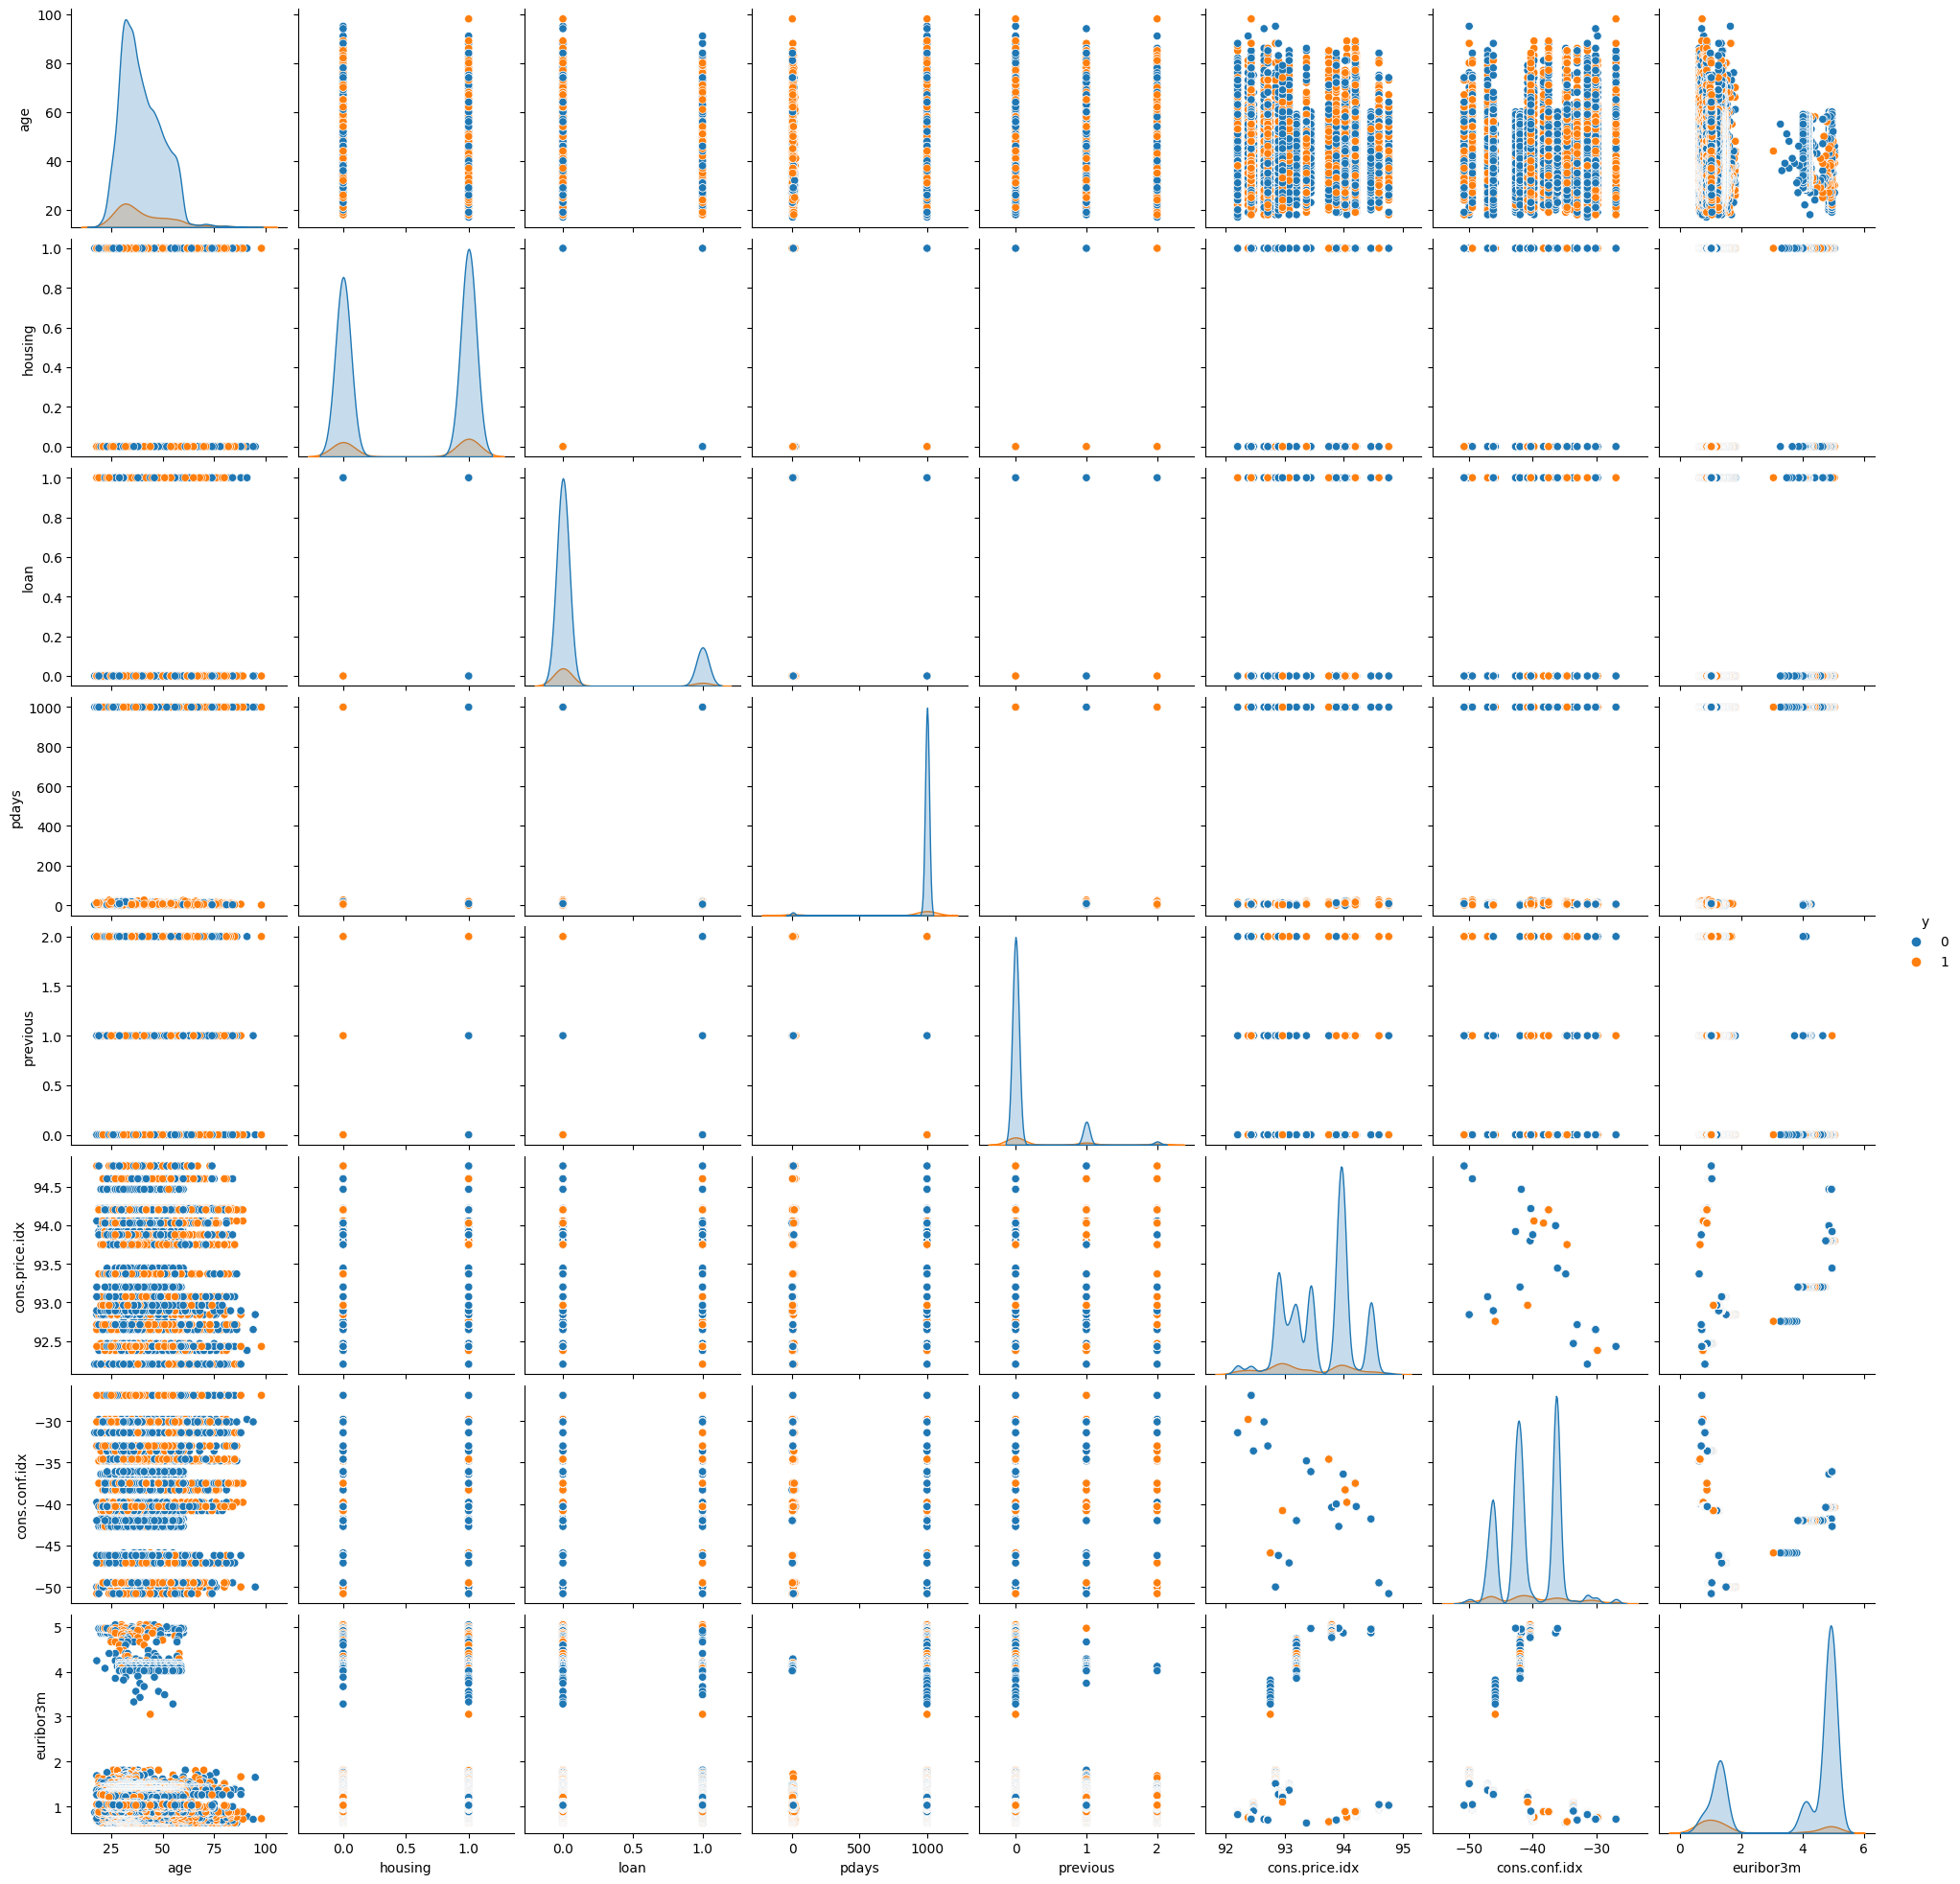

In [ ]:
# visualizing numerical columns
sns.pairplot(hue='y', data = df)
plt.show()

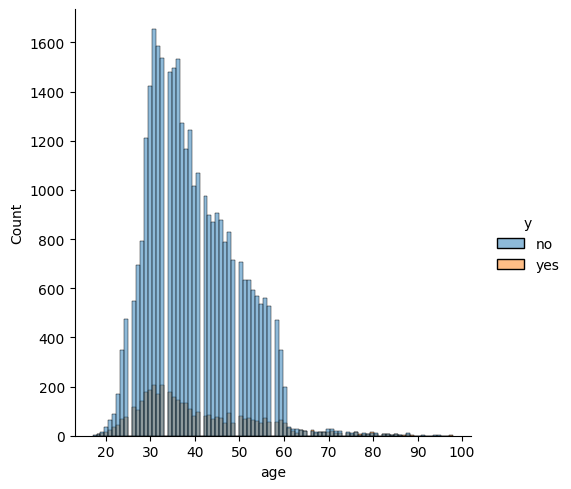

In [ ]:
sns.displot(x = 'age', hue='y', data=df)
plt.show()

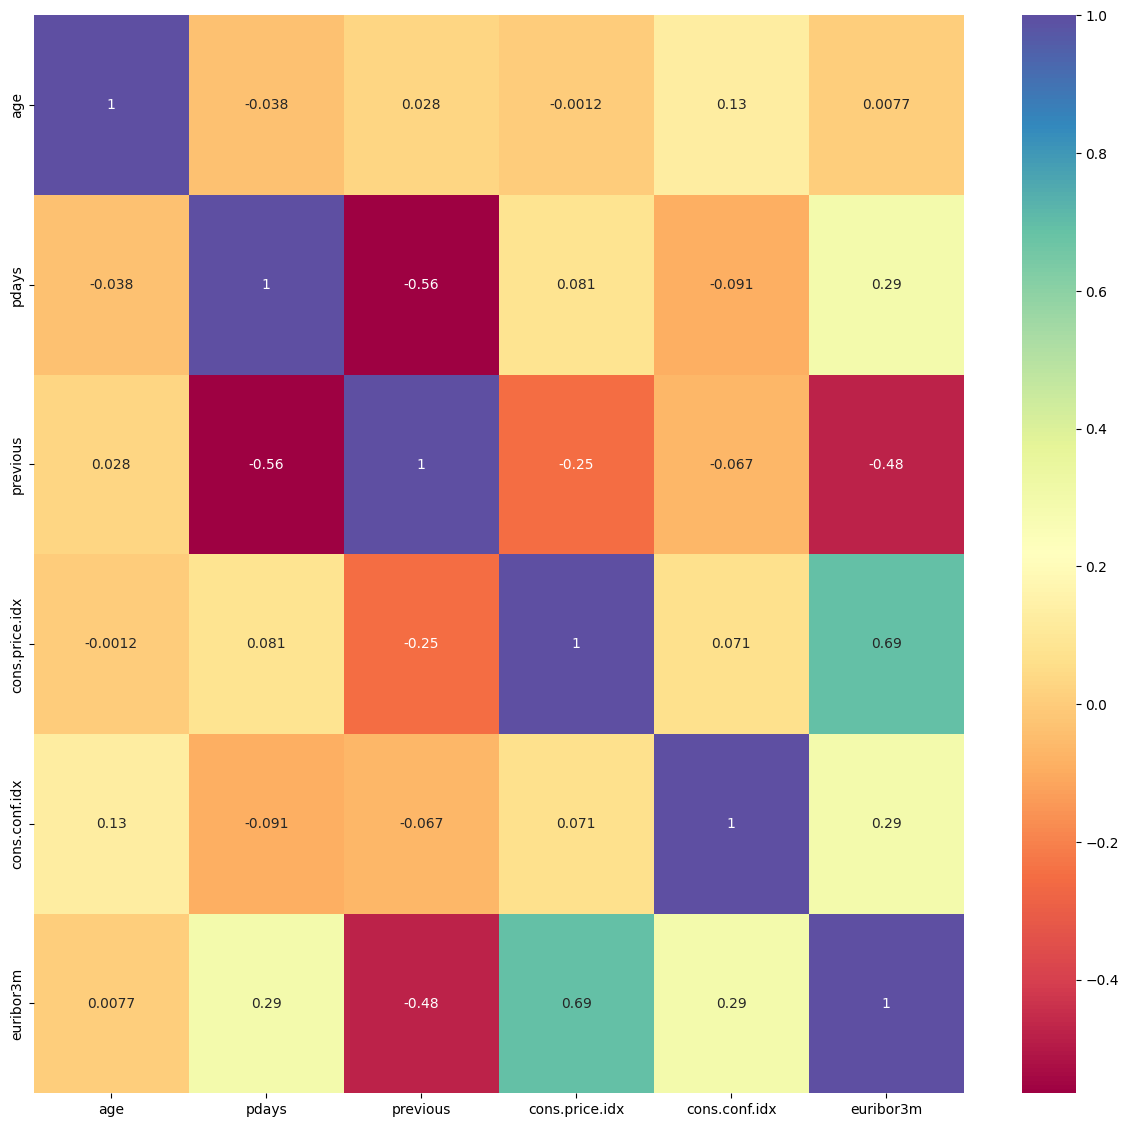

In [ ]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

**One Hot Encoding for categorical variables**

In [ ]:
varlist = ['loan', 'housing', 'y']

df[varlist] = df[varlist].apply(lambda x: x.map({'yes':1, 'no': 0}))

In [ ]:
# Get the dummy variables for contact, poutcome , job, month, marital, day_of_week, education
# Let's drop the first column from  using 'drop_first = True' as first column can be derived using other columns
# (dropping redundant column)

contact = pd.get_dummies(df.contact, drop_first=True)
poutcome = pd.get_dummies(df.poutcome, drop_first=True)
job = pd.get_dummies(df.job, drop_first=True)
month = pd.get_dummies(df.month, drop_first=True)
marital = pd.get_dummies(df.marital, drop_first=True)
day_of_week = pd.get_dummies(df.day_of_week, drop_first=True)
education = pd.get_dummies(df.education, drop_first=True)

In [ ]:
# Concat the dummy columns to the dataframe
df = pd.concat([df, contact, poutcome , job, month, marital, day_of_week, education], axis=1)
df.head()

age        job  marital    education  housing  loan    contact month  \
0   56  housemaid  married     basic.4y        0     0  telephone   may   
1   57   services  married  high.school        0     0  telephone   may   
2   37   services  married  high.school        1     0  telephone   may   
3   40     admin.  married     basic.6y        0     0  telephone   may   
4   56   services  married  high.school        0     1  telephone   may   

  day_of_week  pdays  ...  mon thu  tue  wed  basic.6y  basic.9y  high.school  \
0         mon    999  ...    1   0    0    0         0         0            0   
1         mon    999  ...    1   0    0    0         0         0            1   
2         mon    999  ...    1   0    0    0         0         0            1   
3         mon    999  ...    1   0    0    0         1         0            0   
4         mon    999  ...    1   0    0    0         0         0            1   

   illiterate  professional.course  university.degree  
0           0                    0                  0  
1           0                    0                  0  
2           0                    0                  0  
3           0                    0                  0  
4           0                    0                  0  

[5 rows x 50 columns]

In [ ]:
# Dropping contact, poutcome , job, month, marital, day_of_week, education as we have concatenated the dummies in our original dataframe
df.drop(['contact', 'poutcome' , 'job', 'month', 'marital', 'day_of_week', 'education'], axis = 1, inplace = True)
df.head()

age  housing  loan  pdays  previous  cons.price.idx  cons.conf.idx  \
0   56        0     0    999         0          93.994          -36.4   
1   57        0     0    999         0          93.994          -36.4   
2   37        1     0    999         0          93.994          -36.4   
3   40        0     0    999         0          93.994          -36.4   
4   56        0     1    999         0          93.994          -36.4   

   euribor3m  y  telephone  ...  mon  thu  tue  wed  basic.6y  basic.9y  \
0      4.857  0          1  ...    1    0    0    0         0         0   
1      4.857  0          1  ...    1    0    0    0         0         0   
2      4.857  0          1  ...    1    0    0    0         0         0   
3      4.857  0          1  ...    1    0    0    0         1         0   
4      4.857  0          1  ...    1    0    0    0         0         0   

   high.school  illiterate  professional.course  university.degree  
0            0           0                    0                  0  
1            1           0                    0                  0  
2            1           0                    0                  0  
3            0           0                    0                  0  
4            1           0                    0                  0  

[5 rows x 43 columns]

In [ ]:
df.columns, len(df.columns)

(Index(['age', 'housing', 'loan', 'pdays', 'previous', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'y', 'telephone', 'nonexistent',
        'success', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep', 'married', 'single', 'mon', 'thu', 'tue', 'wed', 'basic.6y',
        'basic.9y', 'high.school', 'illiterate', 'professional.course',
        'university.degree'],
       dtype='object'),
 43)

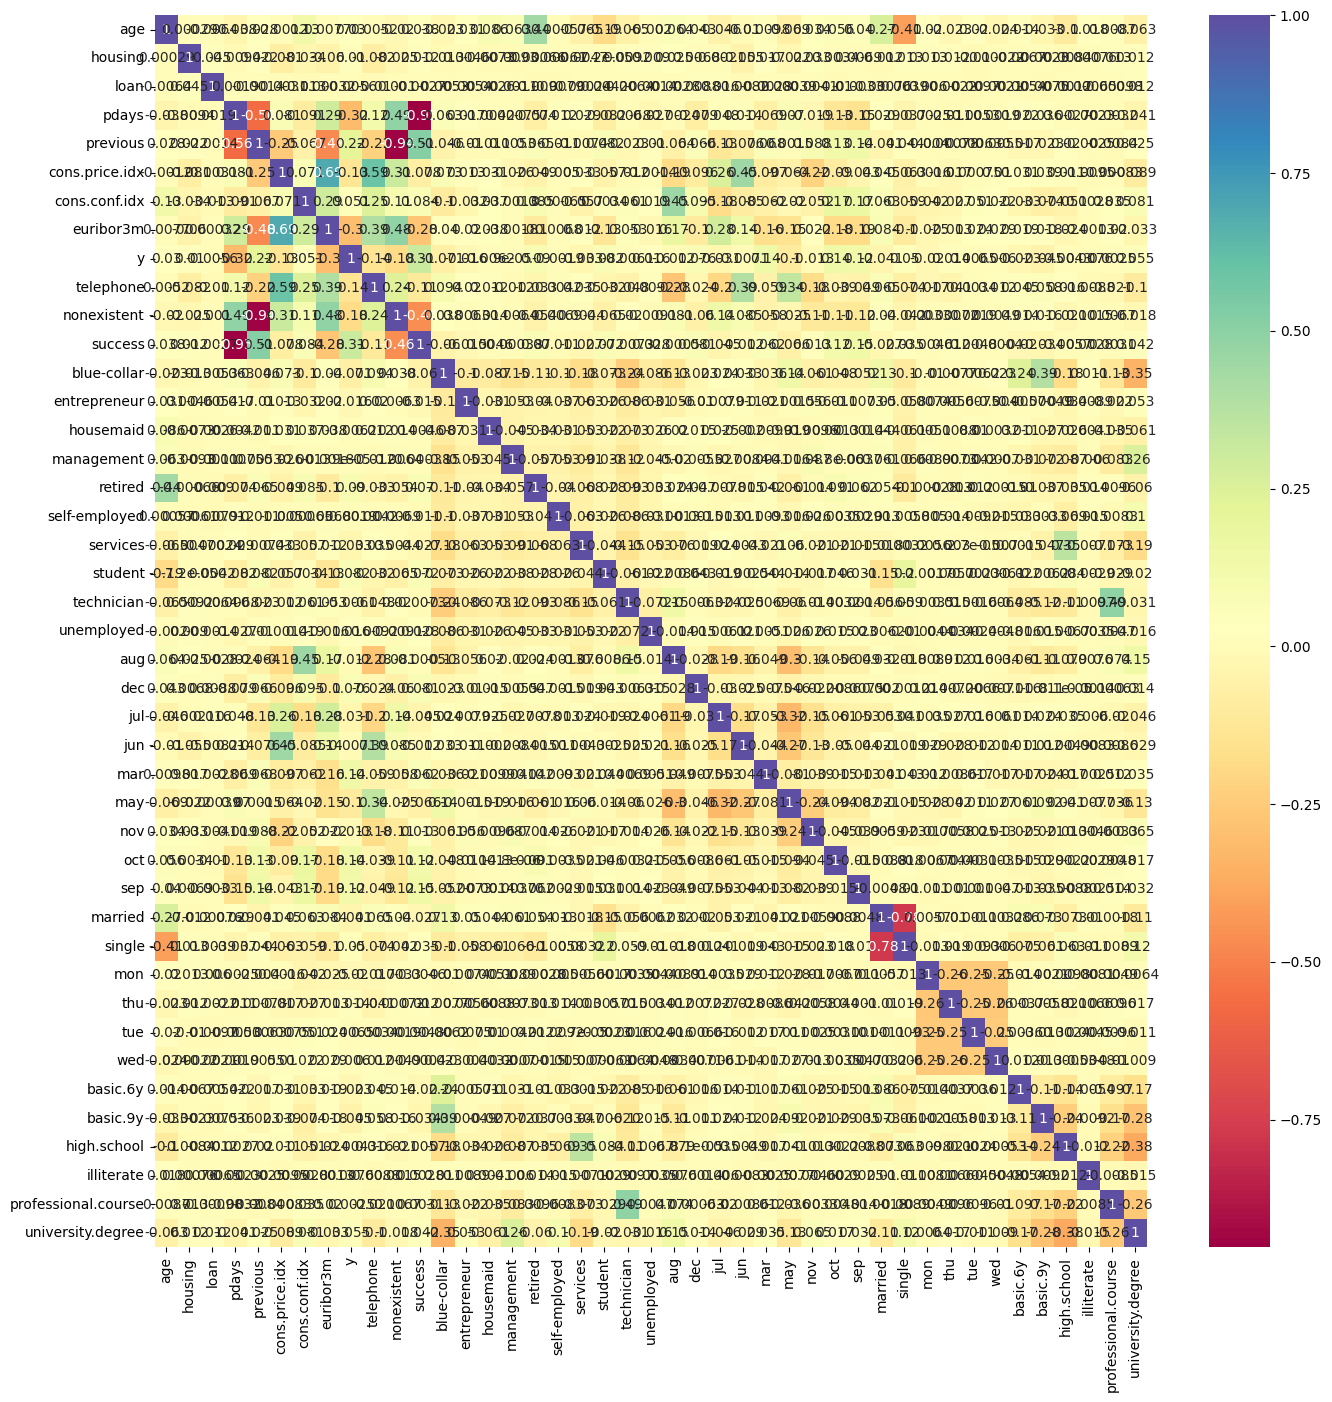

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

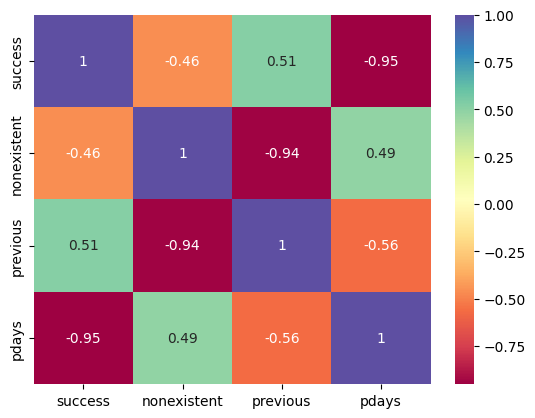

In [ ]:
sns.heatmap(df[['success', 'nonexistent', 'previous', 'pdays']].corr(), annot=True, cmap='Spectral')
plt.show()

**Negative Correlation:**
1. Previous v/s Nonexistent
2. Pdays v/s Success

In [ ]:
df.drop(['previous', 'pdays'], axis = 1, inplace = True)

In [ ]:
var_numerical = list(set(var_numerical) - set(['previous', 'pdays']))

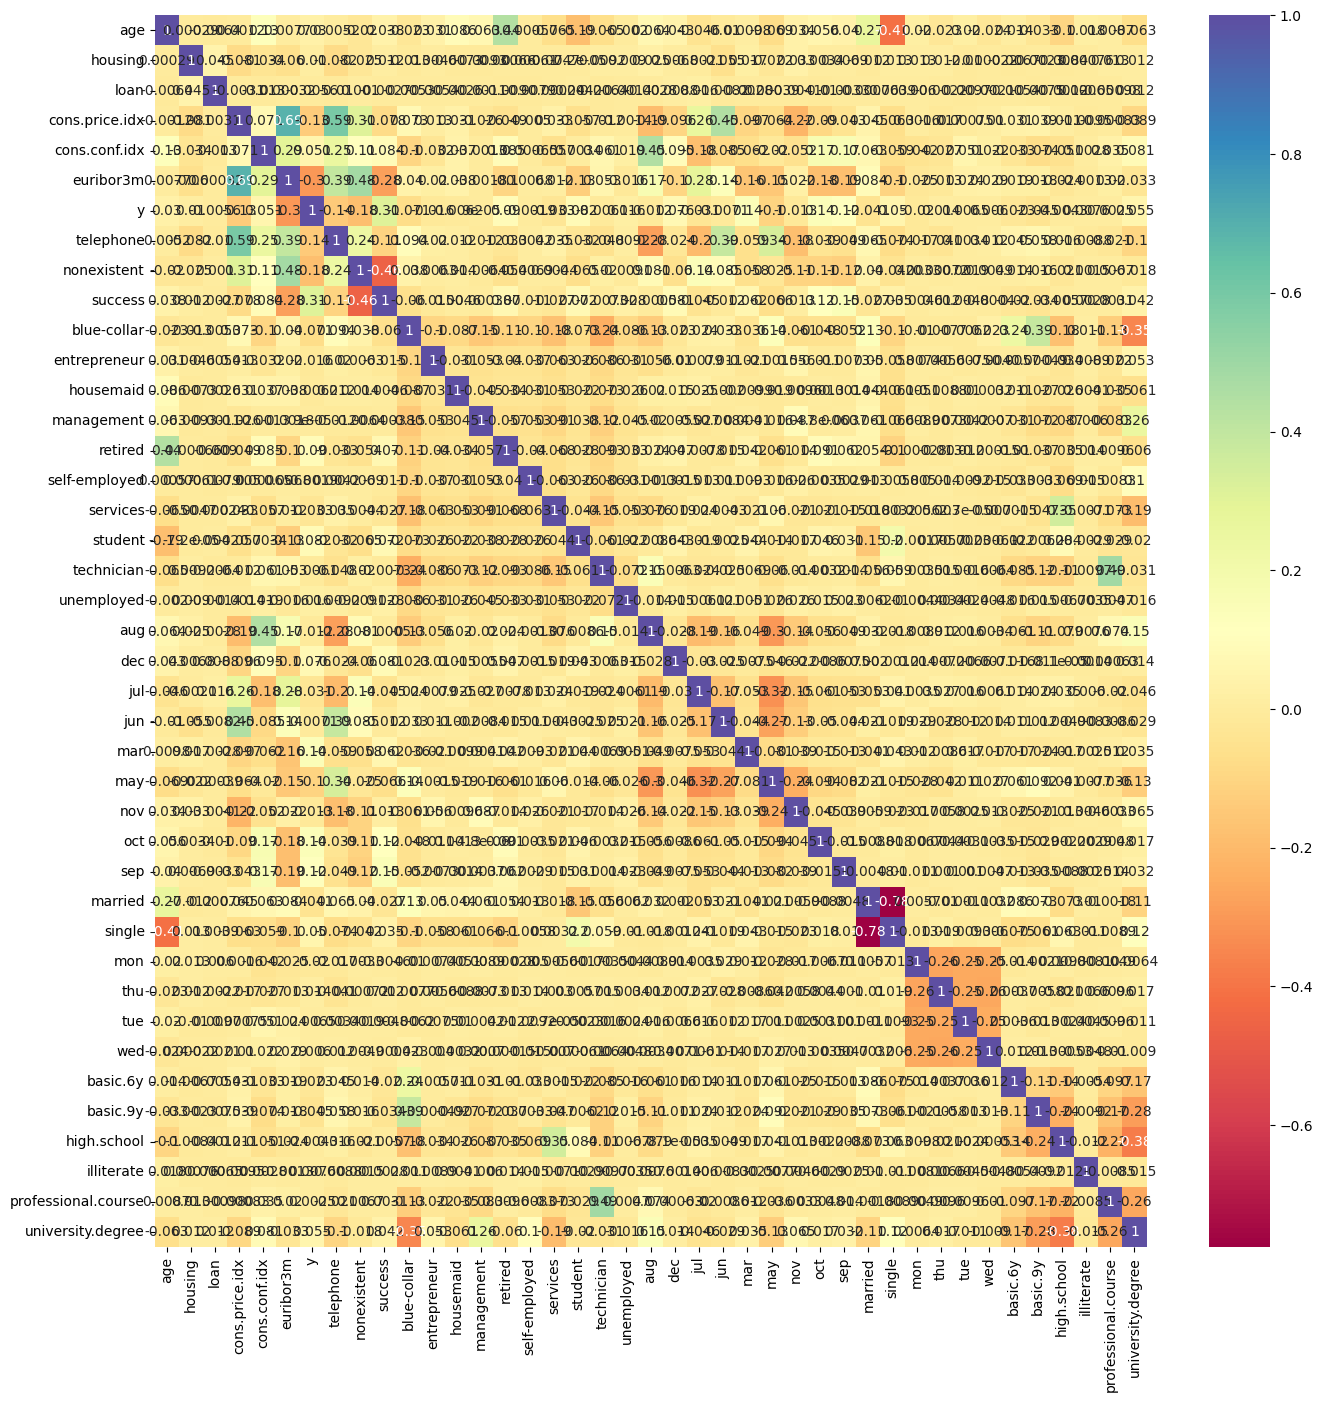

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

In [ ]:
df.corr()['y']

age                    0.030130
housing                0.009996
loan                  -0.005603
cons.price.idx        -0.133084
cons.conf.idx          0.051424
euribor3m             -0.300580
y                      1.000000
telephone             -0.140866
nonexistent           -0.184489
success                0.311555
blue-collar           -0.071404
entrepreneur          -0.015897
housemaid             -0.006232
management             0.000090
retired                0.089646
self-employed         -0.001888
services              -0.032759
student                0.082182
technician            -0.006091
unemployed             0.016334
aug                   -0.012077
dec                    0.075847
jul                   -0.030556
jun                   -0.007129
mar                    0.144351
may                   -0.104725
nov                   -0.013458
oct                    0.142853
sep                    0.123514
married               -0.040845
single                 0.050106
mon     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38245 non-null  int64  
 1   housing              38245 non-null  int64  
 2   loan                 38245 non-null  int64  
 3   cons.price.idx       38245 non-null  float64
 4   cons.conf.idx        38245 non-null  float64
 5   euribor3m            38245 non-null  float64
 6   y                    38245 non-null  int64  
 7   telephone            38245 non-null  uint8  
 8   nonexistent          38245 non-null  uint8  
 9   success              38245 non-null  uint8  
 10  blue-collar          38245 non-null  uint8  
 11  entrepreneur         38245 non-null  uint8  
 12  housemaid            38245 non-null  uint8  
 13  management           38245 non-null  uint8  
 14  retired              38245 non-null  uint8  
 15  self-employed        38245 non-null 

In [ ]:
# Assuming df is your DataFrame
#df = df.astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38245 non-null  int64  
 1   housing              38245 non-null  int64  
 2   loan                 38245 non-null  int64  
 3   cons.price.idx       38245 non-null  float64
 4   cons.conf.idx        38245 non-null  float64
 5   euribor3m            38245 non-null  float64
 6   y                    38245 non-null  int64  
 7   telephone            38245 non-null  uint8  
 8   nonexistent          38245 non-null  uint8  
 9   success              38245 non-null  uint8  
 10  blue-collar          38245 non-null  uint8  
 11  entrepreneur         38245 non-null  uint8  
 12  housemaid            38245 non-null  uint8  
 13  management           38245 non-null  uint8  
 14  retired              38245 non-null  uint8  
 15  self-employed        38245 non-null 

**Split Data Into Train and Test**

In [ ]:
# split the data into training and testing set

from sklearn.model_selection import train_test_split
target = 'y'
X = df.drop(columns=[target])
y = df[target]

# Display the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X shape: (38245, 40)
y shape: (38245,)


**Scaling the dataset**

Our data is not normally distributed so we will use MinMaxScaler. It can also handle some of the outliers which we have in our data.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Creating a Logistic Regression model
logreg = LogisticRegression(random_state=42)

In [ ]:
# Train the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions and accuracy for logistic regression
pred_logreg = logreg.predict(X_test)
logreg = accuracy_score(y_test, pred_logreg)
logreg

0.899463982219898

In [ ]:
# Print the classification report
print("Classification Report:\n", classification_report(y_test, pred_logreg))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      6792
           1       0.66      0.21      0.32       857

    accuracy                           0.90      7649
   macro avg       0.78      0.60      0.63      7649
weighted avg       0.88      0.90      0.88      7649



**Hyper-parameter tuning logistic regression**

In [ ]:
#Creating an instance of the logistic regression model
logreg = LogisticRegression()

# Define the hyperparameter grid to search
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  }

# Creating a GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fitting the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Displaying the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predicting on the test set using the best model
pred_logreg = grid_search.predict(X_test)

# Evaluating the model
logreg = accuracy_score(y_test, pred_logreg)
print("Accuracy:", logreg)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8971107334292064


**2. SVM (Support Vector Machine) Model**

In [ ]:
#Import svm model
from sklearn import svm

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
# Creating a Logistic Regression model
model_svc = SVC()

In [ ]:
# Training the model
model_svc.fit(X_train, y_train)

SVC()

In [ ]:
#Calculating predictions, and accuracy score
pred_svc = model_svc.predict(X_test)
svm = accuracy_score(y_test, pred_svc)
svm

0.8964570532095699

In [ ]:
#Building classification report
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      6792
           1       0.62      0.19      0.29       857

    accuracy                           0.90      7649
   macro avg       0.76      0.59      0.62      7649
weighted avg       0.87      0.90      0.87      7649



**Hyper-parameter tuning SVC Model**

In [ ]:
#Creating an instance of the SVC model
model_svc = SVC()

# Define the hyperparameter grid to search
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  }

# Creating a GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fitting the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Displaying the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predicting on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluating the model
svm = accuracy_score(y_test, y_pred)
print("Accuracy:", svm)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8971107334292064


**3. KNN Model**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Train Model and Predict
knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
pred_knn= knn.predict(X_test)

In [ ]:
knn = accuracy_score(y_test, pred_knn)
knn

0.8946267485945876

In [ ]:
#Building classification report
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6792
           1       0.58      0.23      0.32       857

    accuracy                           0.89      7649
   macro avg       0.74      0.60      0.63      7649
weighted avg       0.87      0.89      0.87      7649



**Hyper-parameter tuning knn model**

In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
knn = accuracy_score(y_test, y_pred)
print("Accuracy:", knn)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.8969799973852791


**4. Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit the model to the training data
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = random_forest.predict(X_test)

In [ ]:
# Evaluate the model
rf = accuracy_score(y_test, y_pred)
print("Accuracy:", rf)

Accuracy: 0.8865211138710942


In [ ]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      6792
           1       0.49      0.28      0.36       857

    accuracy                           0.89      7649
   macro avg       0.70      0.62      0.65      7649
weighted avg       0.87      0.89      0.87      7649



**Hyper-parameter tuning Random forest model**

In [ ]:
# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

In [ ]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

In [ ]:
# Evaluate the model
rf = accuracy_score(y_test, y_pred)
print("Accuracy:", rf)

Accuracy: 0.9006406066152438


**5. Naive Bayes Model**

In [ ]:
# create the Naive Bayes' Classifier and use the train dataset to train the model
classifier=GaussianNB()
classifier.fit(X_train, y_train)

# predict the results of the model
y_pred=classifier.predict(X_test)

# Evaluate the model
nb = accuracy_score(y_test, y_pred)
print("Accuracy:", nb)

# Evaluating the model using classification report
print(classification_report(y_test,y_pred))

Accuracy: 0.8703098444241077
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      6792
           1       0.41      0.38      0.40       857

    accuracy                           0.87      7649
   macro avg       0.67      0.66      0.66      7649
weighted avg       0.87      0.87      0.87      7649



**Hyper-parameter tuning Naive Bayes model**

In [ ]:
# Create a Gaussian Naive Bayes classifier
classifier=GaussianNB()

# Define the hyperparameter grid to search (only var_smoothing for Gaussian Naive Bayes)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
nb = accuracy_score(y_test, y_pred)
print("Accuracy:", nb)

Best Hyperparameters: {'var_smoothing': 1e-05}
Accuracy: 0.8703098444241077


 **6. Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the accuracy of the model
gb = accuracy_score(y_test, y_pred)
print("Accuracy:", gb)

Accuracy: 0.9006406066152438


**Hyper-parameter tuning Gradient Boosting Classifier**

In [ ]:
# Create a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
gb = accuracy_score(y_test, y_pred)
print("Accuracy:", gb)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.9006406066152438


**Calculating the AUC for the different models**

In [ ]:
# calculating the Logistic Regression AUC
logreg.fit(X_train, y_train)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
auc_logreg = roc_auc_score(y_test, y_prob_logreg)
print('AUC:', auc_logreg)


AUC: 0.7696010166397972


In [ ]:
# calculating the SVM AUC
model_svc.fit(X_train, y_train)
decision_scores_svc = model_svc.decision_function(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, decision_scores_svc)
svm = roc_auc_score(y_test, decision_scores_svc)
print('AUC:', svm)

AUC: 0.7001659066263693


In [ ]:
# calculating the knn AUC
knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
pred_knn= knn.predict(X_test)
#y_prob_knn = KNeighborsClassifier(n_neighbors = i)(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, pred_knn)
auc_knn = roc_auc_score(y_test, pred_knn)
print('AUC:', auc_knn)


AUC: 0.602658440226885


In [ ]:
# calculating the Random Forest AUC
random_forest.fit(X_train, y_train)
y_prob_random_forest = random_forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred)
auc_rf = roc_auc_score(y_test, y_pred)
print('AUC:', auc_rf)


AUC: 0.6101232935171174


In [ ]:
# calculating the Naive Bayes AUC
classifier.fit(X_train, y_train)
y_prob_nb = classifier.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred)
auc_nb = roc_auc_score(y_test, y_pred)
print('AUC:', auc_nb)

AUC: 0.6101232935171174


In [ ]:
# calculating the Gradient Boosting Classifier AUC
gb_classifier.fit(X_train, y_train)
y_prob_gb = gb_classifier.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred)
auc_gb = roc_auc_score(y_test, y_pred)
print('AUC:', auc_gb)

AUC: 0.6101232935171174


**Visualizing the ROC/AUC for the models**

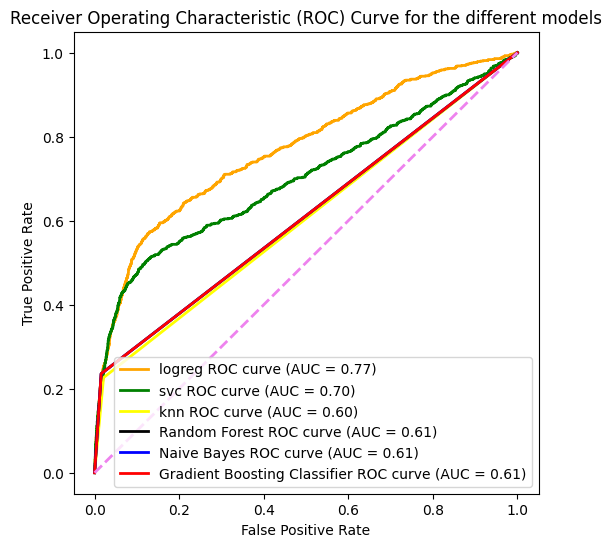

In [ ]:
# Calculate ROC curves and AUCs for the models

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
auc_logreg = roc_auc_score(y_test, y_prob_logreg)

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, decision_scores_svc)
auc_svc = roc_auc_score(y_test, decision_scores_svc)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, pred_knn)
auc_knn = roc_auc_score(y_test, pred_knn)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred)
auc_rf = roc_auc_score(y_test, y_pred)

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred)
auc_nb = roc_auc_score(y_test, y_pred)

fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred)
auc_gb = roc_auc_score(y_test, y_pred)

# Plot ROC curves
plt.figure(figsize=(6, 6))

# Plot logreg ROC curve
plt.plot(fpr_logreg, tpr_logreg, color='orange', lw=2, label='logreg ROC curve (AUC = {:.2f})'.format(auc_logreg))

#Plot SVM ROC curve
plt.plot(fpr_svc, tpr_svc, color='green', lw=2, label= 'svc ROC curve (AUC = {:.2f})'.format(auc_svc))

# Plot k-NN ROC curve
plt.plot(fpr_knn, tpr_knn, color='yellow', lw=2, label= 'knn ROC curve (AUC = {:.2f})'.format(auc_knn))

# Plot Random Forest ROC curve
plt.plot(fpr_rf, tpr_rf, color='black', lw=2, label= 'Random Forest ROC curve (AUC = {:.2f})'.format(auc_rf))

# Plot Naive Bayes ROC curve
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='Naive Bayes ROC curve (AUC = {:.2f})'.format(auc_nb))


#Plot Gradient Boosting Classifier ROC curve
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label= 'Gradient Boosting Classifier ROC curve (AUC = {:.2f})'.format(auc_gb))

plt.plot([0, 1], [0, 1], color='violet', lw=2, linestyle='--')  # Plot the random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for the different models')
plt.legend(loc='lower right')
plt.show()


**Summary of accuracy scores for the different models**

In [ ]:
# Scores of the different models
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Random Forest', 'Naive Bayes', 'Gradient Boosting Classifier'],
    'Score': [logreg, svm, knn, rf, nb, gb]})

# Sorting the DataFrame by the 'Score' column
models_sorted = models.sort_values(by='Score', ascending=False)

# Displaying the sorted DataFrame
print(models_sorted)

                          Model     Score
5  Gradient Boosting Classifier  0.900641
0           Logistic Regression  0.899464
1       Support Vector Machines  0.896457
2                           KNN  0.894627
3                 Random Forest  0.886521
4                   Naive Bayes  0.870310
